# UK GENDER WAGE GAP 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy import stats
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
from sklearn.metrics import mean_squared_error, r2_score

plt.rcParams['figure.figsize'] = (16.0, 12.0)
plt.style.use('ggplot')

In [3]:
# create dataframe
data = pd.read_csv("UK-Gender-Pay-Gap-2018-19.csv",index_col=0)
data = pd.DataFrame(data)

Lets look at our data 

In [4]:
data

Company Num         SIC code                           Organisation  \
0         226143            85310        "Bryanston School",Incorporated   
1       SC016876            47730   "RED BAND" CHEMICAL COMPANY, LIMITED   
2        3951948            61900                            118 LIMITED   
3       10530651            78300                      123 EMPLOYEES LTD   
4        4104101  85200,\r\n85310                             1509 GROUP   
...          ...              ...                                    ...   
4576     1107406            47110                  ICELAND FOODS LIMITED   
4577     8776727            10890                     ICHIBAN UK LIMITED   
4578      282648            30300          ICON AEROSPACE TECHNOLOGY LTD   
4579     2541764            72190  ICON CLINICAL RESEARCH (U.K.) LIMITED   
4580     4399985            96090                       Ics Umbrella Ltd   

                                                Address  \
0     Bryanston House,\r\nBlandford,\r\nDorset,\r\nU...   
1     19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...   
2     Fusion Point,\r\nDumballs Road,\r\nCardiff,\r\...   
3     34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...   
4     Royal Grammar School, High Street,\r\nGuildfor...   
...                                                 ...   
4576  Second Avenue,\r\nDeeside Industrial Park,\r\n...   
4577  Barrack Farm,\r\nWarren Lane,  Woolpit,\r\nBur...   
4578  Victoria Works, Thrumpton Lane,\r\nRetford,\r\...   
4579  Concept House,\r\n6 Stoneycroft Rise,\r\nChand...   
4580  2 Mannin Way,\r\nLancaster,\r\nUnited Kingdom,...   

                          Organisation name  Male bottom quartile %  \
0           "Bryanston School",Incorporated                    32.4   
1      "RED BAND" CHEMICAL COMPANY, LIMITED                    31.6   
2                               118 LIMITED                    41.0   
3                         123 EMPLOYEES LTD                     0.0   
4                                1509 GROUP                    38.1   
...                                     ...                     ...   
4576                  ICELAND FOODS LIMITED                    29.5   
4577                     ICHIBAN UK LIMITED                    62.1   
4578          ICON AEROSPACE TECHNOLOGY LTD                    75.0   
4579  ICON CLINICAL RESEARCH (U.K.) LIMITED                    15.8   
4580                       Ics Umbrella Ltd                    65.0   

      Female bottom quartile %  Male lower middle quartile %  \
0                         67.6                          38.2   
1                         68.4                          12.7   
2                         59.0                          45.0   
3                        100.0                           2.0   
4                         61.9                          43.6   
...                        ...                           ...   
4576                      70.5                          39.6   
4577                      37.9                          65.5   
4578                      25.0                          75.0   
4579                      84.2                          23.7   
4580                      35.0                          56.0   

      Female lower middle quartile %  Male upper middle quartile %  ...  \
0                               61.8                          44.9  ...   
1                               87.3                          11.6  ...   
2                               55.0                          50.0  ...   
3                               98.0                          17.0  ...   
4                               56.4                          48.4  ...   
...                              ...                           ...  ...   
4576                            60.4                          54.9  ...   
4577                            34.5                          43.7  ...   
4578                            25.0                          73.5  ...   
4579       

The data contains 25 columns and 4581 rows. 

The lower, top and middle quartile refers to the percentage of men and women in the lower, top and middle quartile of the pay scale. 

In [5]:
# check if any data is missing 
data.isna().any()

Company Num                                   True
SIC code                                      True
Organisation                                 False
Address                                       True
Organisation name                            False
Male bottom quartile %                       False
Female bottom quartile %                     False
Male lower middle quartile %                 False
Female lower middle quartile %               False
Male upper middle quartile %                 False
Female upper middle quartile %               False
Male top quartile %                          False
Female top quartile %                        False
Mean wage difference %                       False
Median wage difference %                     False
Mean bonus difference %                      False
Median bonus difference %                    False
Male bonus %                                 False
Female bonus %                               False
URL to public gender pay gap in

In [6]:
# convert datatypes
data['Male bonus %'] = data['Male bonus %'].astype(float)
data['SIC code'] = data['SIC code'].astype(str)

The initial data appears quite clean and straightforward, with some observable trends. For instance, there seems to be a slight overweight of female employes at lower wage levels and male employees at higher levels, with men generally receiving more bonuses and higher pay. However, this doesn't provide a clear picture of how these disparities manifest across different sectors, nor does it shed light on whether wage gaps vary between sectors. To investigate this, it's necessary to explore correlations between wage inequities and sectoral differences. 

The dataset includes SIC codes, which are five-digit codes indicating the sector in which each company is registered. However, these codes by themselves don't offer much insight, so it's essential to map them to their corresponding sector descriptions. 

To accomplish this, a new feature will be added to the dataset that provides the description for each SIC code. This will be done by creating a new dataframe with SIC code descriptions, which can be downloaded from the UK government website: https://www.gov.uk/government/publications/standard-industrial-classification-of-economic-activities-sic

Once incorporated, this will allow for sector-specific analysis of wage gaps. 

In [7]:
# create new dataframe. 
sic = pd.read_csv('SIC07_CH_condensed_list_en.csv') 
sic = pd.DataFrame(sic)

# look at the data
print(sic.shape)
print(sic.columns,'\n')
print(sic.isna().any(),'\n')
print(sic['SIC Code'])

(731, 2)
Index(['SIC Code', 'Description'], dtype='object') 

SIC Code       False
Description    False
dtype: bool 

0       1110
1       1120
2       1130
3       1140
4       1150
       ...  
726    98000
727    98100
728    98200
729    99000
730    99999
Name: SIC Code, Length: 731, dtype: int64


In [8]:
# look at the SIC codes from the original dataset 
print(data['SIC code'][300:310],'\n')
# get amount of unique values in the column 
unique_values = data['SIC code'].unique()
print('There are',len(unique_values), 'unique values in the SIC codes column')


300                                  73110
301                                  71122
302              71122,\r\n71200,\r\n82990
303    49410,\r\n52103,\r\n52290,\r\n82920
304                        47520,\r\n47530
305                                   1130
306                                  46900
307                                  60200
308                                  21100
309                                  46310
Name: SIC code, dtype: object 

There are 1160 unique values in the SIC codes column


The SIC code column seems to have two different problems in terms of data formatting: Some of them are only four digits and some of them are in the format, '82990,\r\n8730', indicating that the company might belong to two different overlapping sectors. 

If we look at the csv file in Excel the values look like this: 
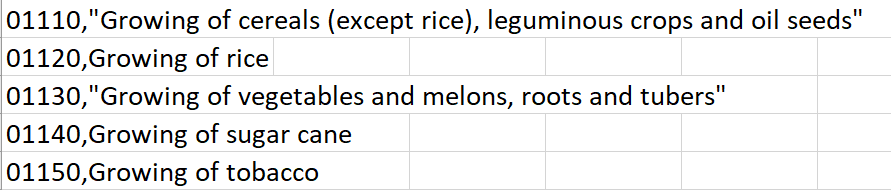

To align the SIC codes in your dataset with the official UK SIC code dataset (which contains five-digit values), the following steps will be taken: 

1) Append a '0' at the end of the rows with only four digits to ensure consistency across the dataset and align with the five-digit format in the UK government file. 

2) For the rows with mutiple SIC codes (eg.'82990,\r\n8730'), only one value will be retained for simplicity. While this approach results in some loss of information, it preserves the primary sector classification and ensures the dataset remains manageable for analysis.

Although this choice introduces some limitation, it allows for a cleaner and more streamlined dataset, keeping a significant portion of the data intact for sector-level analysis. 

In [9]:
# extend four digit values 
data['SIC code'] = data['SIC code'].apply(lambda x: x + '0' if len(x)==4 else x)

# tokenize and add back to column
data['SIC code'] = data['SIC code'].apply(lambda x: x.split(',')[-1].strip())

In [10]:
# fill in missing data 
sic.fillna('', inplace=True)
print(sic.isna().any())

SIC Code       False
Description    False
dtype: bool


We now have two different dataframes each containing important information. 

The goal is to merge the second column from the SIC dataframe into the 'data' dataframe, but only when the values in the first column of the SIC dataframe match the corresponding values in the 'SIC code' column of the 'data' dataframe.

In [11]:
# add a new column with rows of empty strings to the data dataframe to hold the SIC code descriptions
data['SIC Description'] = ''    # dtype = object

# convert type for columns 
sic['Description'] = sic['Description'].astype(str)
sic['SIC Code'] = sic['SIC Code'].astype(str)
data['SIC Description'] = data['SIC Description'].astype(str)

# iterate through the SIC codes and add their descriptions
for i, v in data.iterrows():    # this returns tuple of label and value 
 for x, k in sic.iterrows():
   if i not in sic.index:       # when there is no more rows in sic ends continue looping through data
      continue                 
   if sic['SIC Code'][x] == data['SIC code'][i]:        # check if sic is the same
    #sic_code = data['SIC Code'] 
    #if sic_code in sic['SIC Code']:
    data.loc[i, 'SIC Description'] = sic['Description'][x]      # add values from sic['Description'] to data dataframe
    found_match = True            # match found ! 
    if found_match != True:    
      #print("No match:", i, data.loc[i])
      break  # go to outer loop 
    else: 
      #print(f"SIC Description set for row {i}")
      break     # go to outer loop 

# DISTRIBUTIONS OF GENDER IN TOP AND BOTTOM QUARTILE & CENTRAL TENDENCIES

So now I got the SIC descriptions for each company merged into the original dataframe.

Now lets look at the mean wage difference in the different industries to see if there is any patterns. 


<Axes: xlabel='SIC Description'>

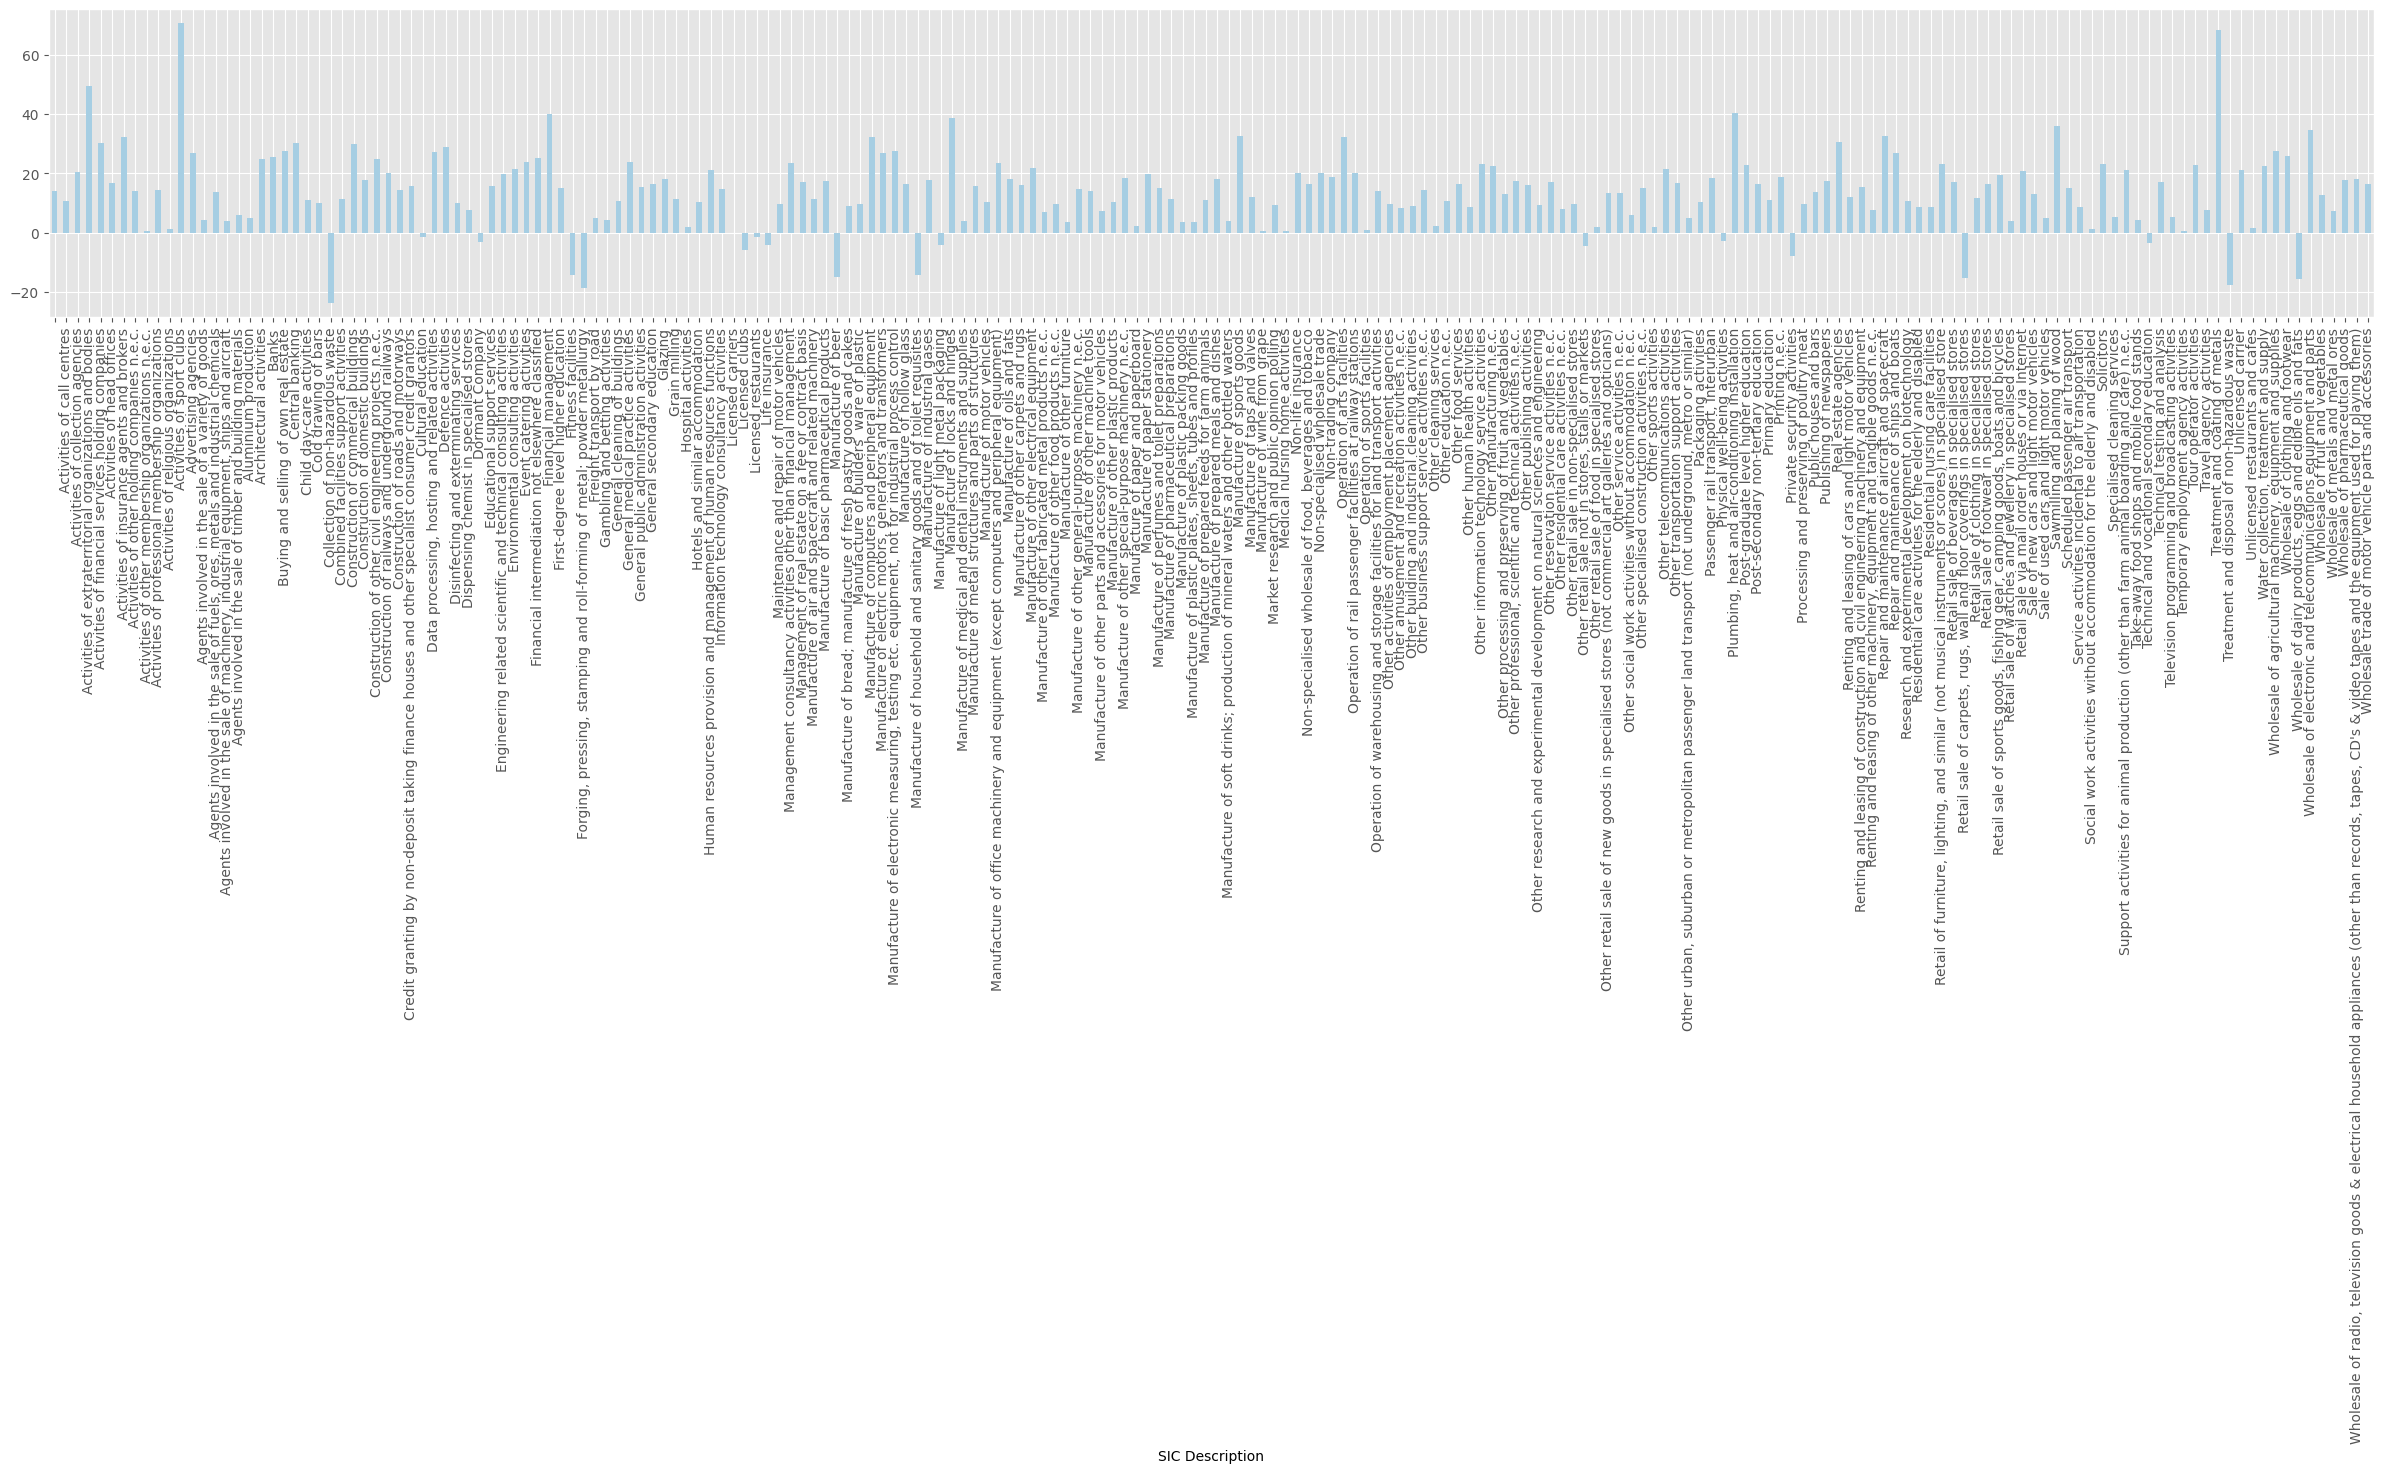

In [12]:
sector_meanwage = data.groupby('SIC Description')['Mean wage difference %'].mean()
sector_meanwage.plot(kind='bar', stacked = 'true', colormap = 'Paired', figsize=(30, 4))

At first glance, the mean wage difference appears quite similar across most sectors, with a few sectors sticking out. 

Let's identify them: 

In [13]:
top_sectors = sector_meanwage.nlargest(5)
print('The top 5 sectors with the biggest mean wage difference is:\n', top_sectors,'\n')

low_sectors = sector_meanwage.nsmallest(5)
print('The top 5 sectors with the smallest mean wage difference is:\n', low_sectors)
                                

The top 5 sectors with the biggest mean wage difference is:
 SIC Description
Activities of sport clubs                                  70.65
Treatment and coating of metals                            68.20
Activities of extraterritorial organizations and bodies    49.40
Plumbing, heat and air-conditioning installation           40.20
Financial management                                       40.00
Name: Mean wage difference %, dtype: float64 

The top 5 sectors with the smallest mean wage difference is:
 SIC Description
Collection of non-hazardous waste                                              -23.8
Forging, pressing, stamping and roll-forming of metal; powder metallurgy       -18.7
Treatment and disposal of non-hazardous waste                                  -17.6
Wholesale of dairy products, eggs and edible oils and fats                     -15.7
Retail sale of carpets, rugs, wall and floor coverings in specialised stores   -15.3
Name: Mean wage difference %, dtype: float64


From this, we can observe that some of the sectors with the highest mean wage differences are fields like Activities of sport clubs, Treatment and coating of metals, and Activities of extraterritorial organizations and bodies. This isn't too surprising, as these sectors are typically male-dominated.

What’s particularly intriguing are the negative values in the dataset. Negative values for mean and median wages indicate that female employees earn more than their male counterparts. In sectors such as Collection of non-hazardous waste and Forging, pressing, stamping, and roll-forming of metal, women earn more on average than men.

Two main things stand out here:

- The mean wage difference is significantly larger when men earn more compared to when women earn more.
- The sectors where women earn the most seem counterintuitive since these are traditionally male-dominated industries.

By examining the distribution of male and female employees in the bottom and top quartiles of the workforce in each sector, we might better understand these patterns.

The top 5 sectors with the most female employees in the top is:
 SIC Description
Child day-care activities                                                    86.800000
Residential nursing care facilities                                          86.160000
Medical nursing home activities                                              84.000000
Social work activities without accommodation for the elderly and disabled    82.350000
Residential care activities for the elderly and disabled                     81.345455
Name: Female top quartile %, dtype: float64 

The top 5 sectors with the least female employees in the top is:
 SIC Description
Activities of extraterritorial organizations and bodies                 0.0
Treatment and coating of metals                                         0.0
Construction of domestic buildings                                      2.2
Manufacture of household and sanitary goods and of toilet requisites    2.3
Repair and maintenance of ships and boats           

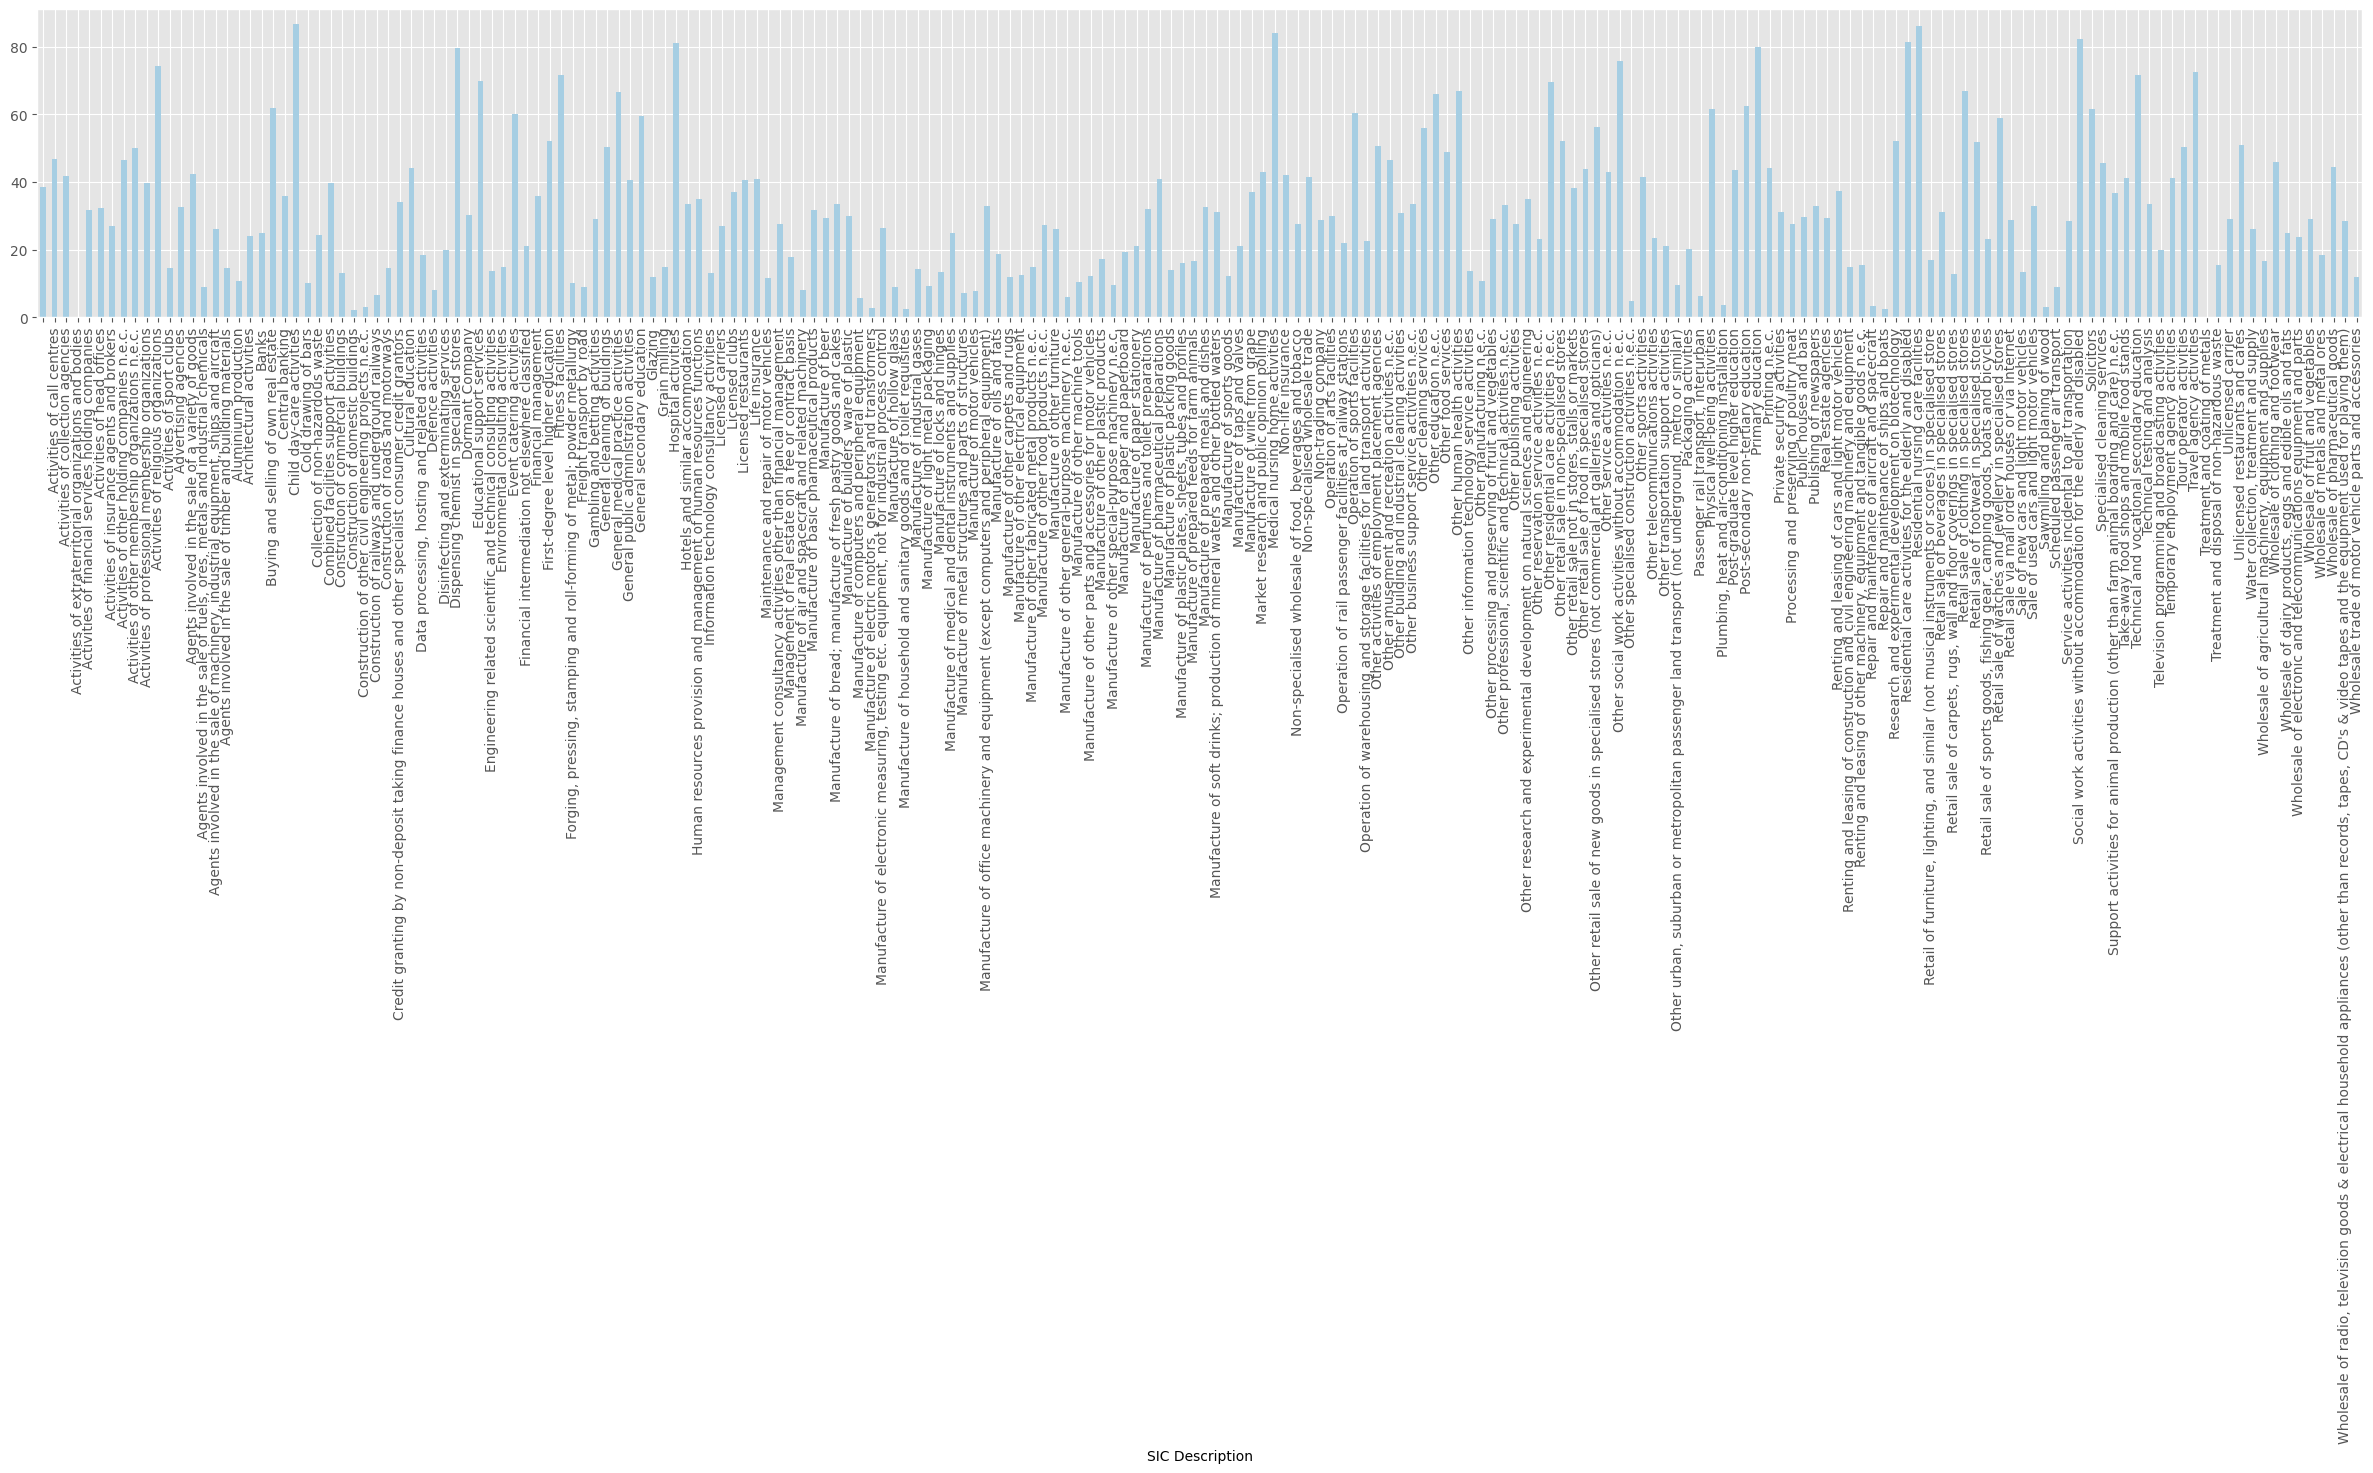

In [14]:
# FEMALE EMPLOYEES IN THE TOP QUARTILE 
sector_meanwage = data.groupby('SIC Description')['Female top quartile %'].mean()
sector_meanwage.plot(kind='bar', stacked = 'true', colormap = 'Paired', figsize=(30, 4))

top_sectors = sector_meanwage.nlargest(5)
print('The top 5 sectors with the most female employees in the top is:\n', top_sectors,'\n')

low_sectors = sector_meanwage.nsmallest(5)
print('The top 5 sectors with the least female employees in the top is:\n', low_sectors)

Here, we observe that sectors with the highest proportion of female employees, such as Child day-care activities, Residential nursing care facilities, and Medical nursing home activities, align with traditionally female-dominated fields.

Additionally, many sectors with the largest mean wage differences also overlap with sectors where fewer women occupy positions in the top quartile of employees. This is somewhat expected. For example, in sectors like Activities of extraterritorial organizations and bodies and Treatment and coating of metals—both of which rank in the top 5 for mean wage difference—there are no women in the top quartile.

Let’s now examine whether this pattern holds for sectors where the majority of female employees fall into the bottom quartile.

The top 5 sectors with the most female employees in the bottom is:
 SIC Description
Treatment and coating of metals                               100.000
Retail sale of watches and jewellery in specialised stores     94.000
Child day-care activities                                      93.825
Event catering activities                                      90.100
Residential nursing care facilities                            86.260
Name: Female bottom quartile %, dtype: float64 

The top 5 sectors with the least female employees in the bottom is:
 SIC Description
Forging, pressing, stamping and roll-forming of metal; powder metallurgy         5.0
Retail sale of carpets, rugs, wall and floor coverings in specialised stores     5.7
Treatment and disposal of non-hazardous waste                                    7.7
Construction of domestic buildings                                              10.2
Manufacture of light metal packaging                                            10.5
Name: F

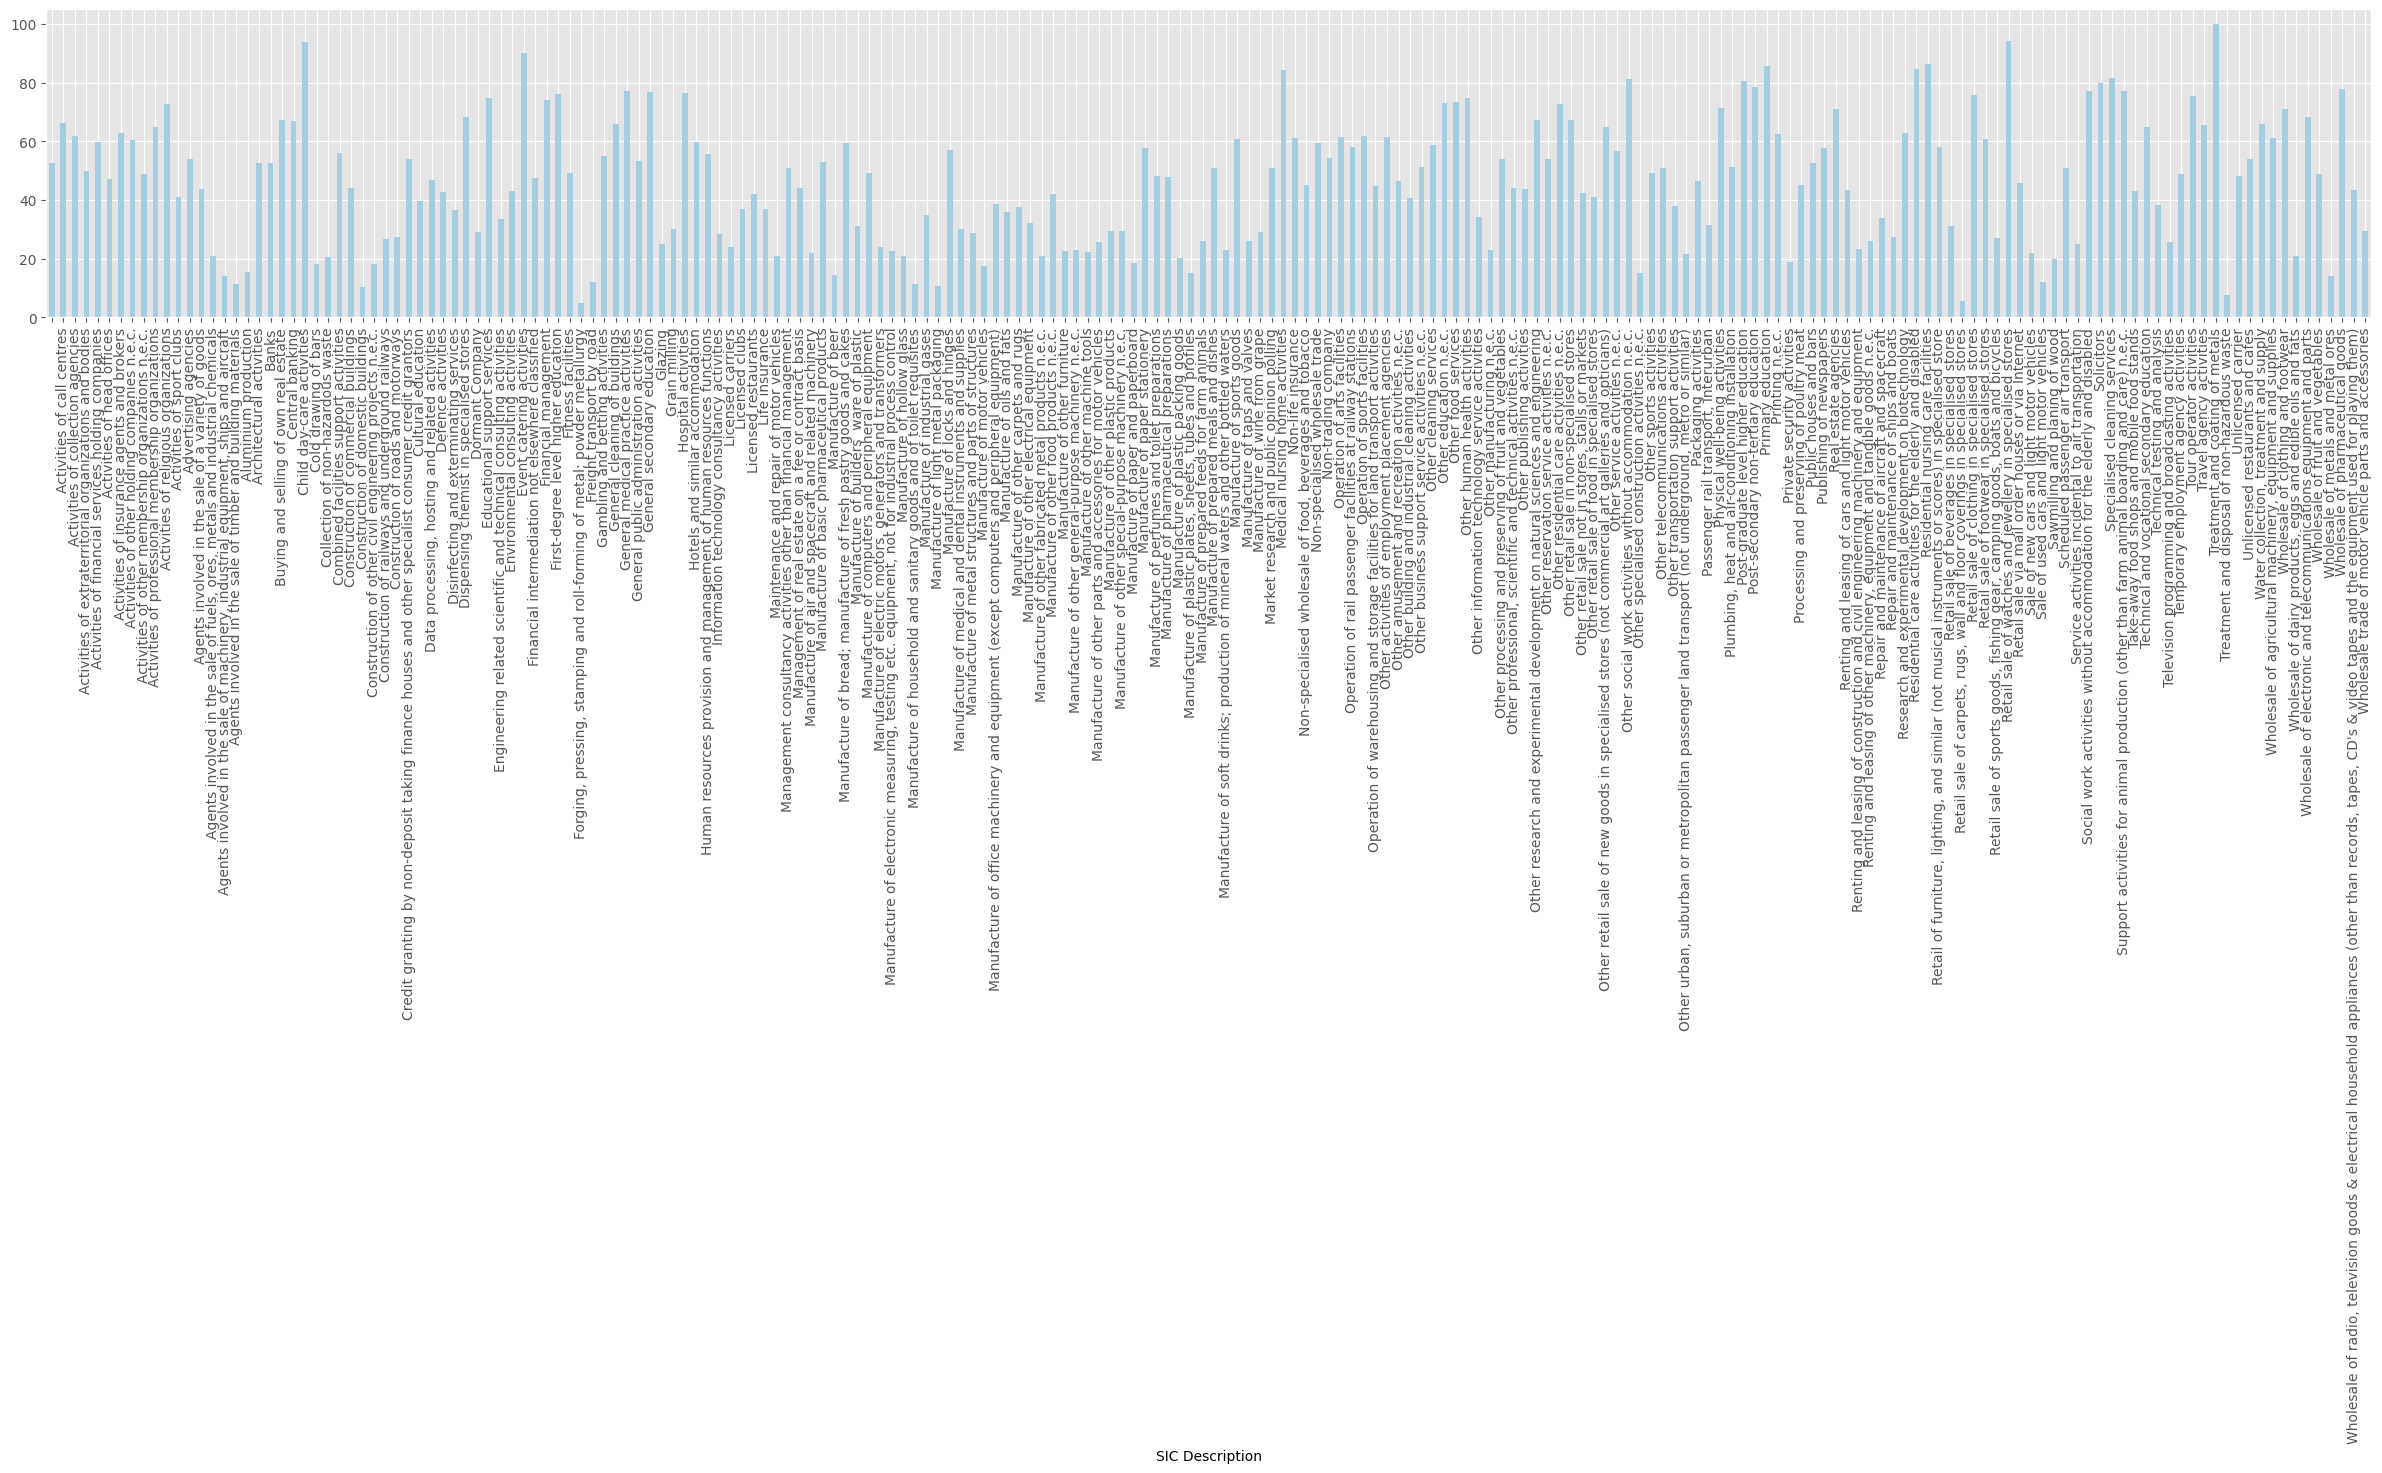

In [15]:
# FEMALE EMPLOYEES IN THE BOTTOM QUARTILE 
sector_meanwage = data.groupby('SIC Description')['Female bottom quartile %'].mean()
sector_meanwage.plot(kind='bar', stacked = 'true', colormap = 'Paired', figsize=(30, 4))

top_sectors = sector_meanwage.nlargest(5)
print('The top 5 sectors with the most female employees in the bottom is:\n', top_sectors,'\n')

low_sectors = sector_meanwage.nsmallest(5)
print('The top 5 sectors with the least female employees in the bottom is:\n', low_sectors)

In the sector Treatment and coating of metals, we see a significant representation of female employees in the bottom quartile, which notably contributes to the overall wage gap.

While it’s expected that the number of women in the bottom quartile would be high in sectors like Treatment and coating of metals, where the mean wage differences are the largest, it’s also important to note that women dominate the bottom quartile in traditionally female sectors like Child day-care activities and Residential nursing care facilities. This suggests that the wage gap is rooted not only in pay disparities but also in the gender distribution across various sectors.

These statistics also provide insight into the overall composition of men and women within different sectors.

Now, let’s take a closer look at the male workforce in these sectors.

The top 5 sectors with the most male employees in the top is:
 SIC Description
Activities of extraterritorial organizations and bodies                 100.0
Treatment and coating of metals                                         100.0
Construction of domestic buildings                                       97.8
Manufacture of household and sanitary goods and of toilet requisites     97.7
Repair and maintenance of ships and boats                                97.5
Name: Male top quartile %, dtype: float64 

The top 5 sectors with the least male employees in the top is:
 SIC Description
Child day-care activities                                                    13.200000
Residential nursing care facilities                                          13.840000
Medical nursing home activities                                              16.000000
Social work activities without accommodation for the elderly and disabled    17.650000
Residential care activities for the elderly and disabled   

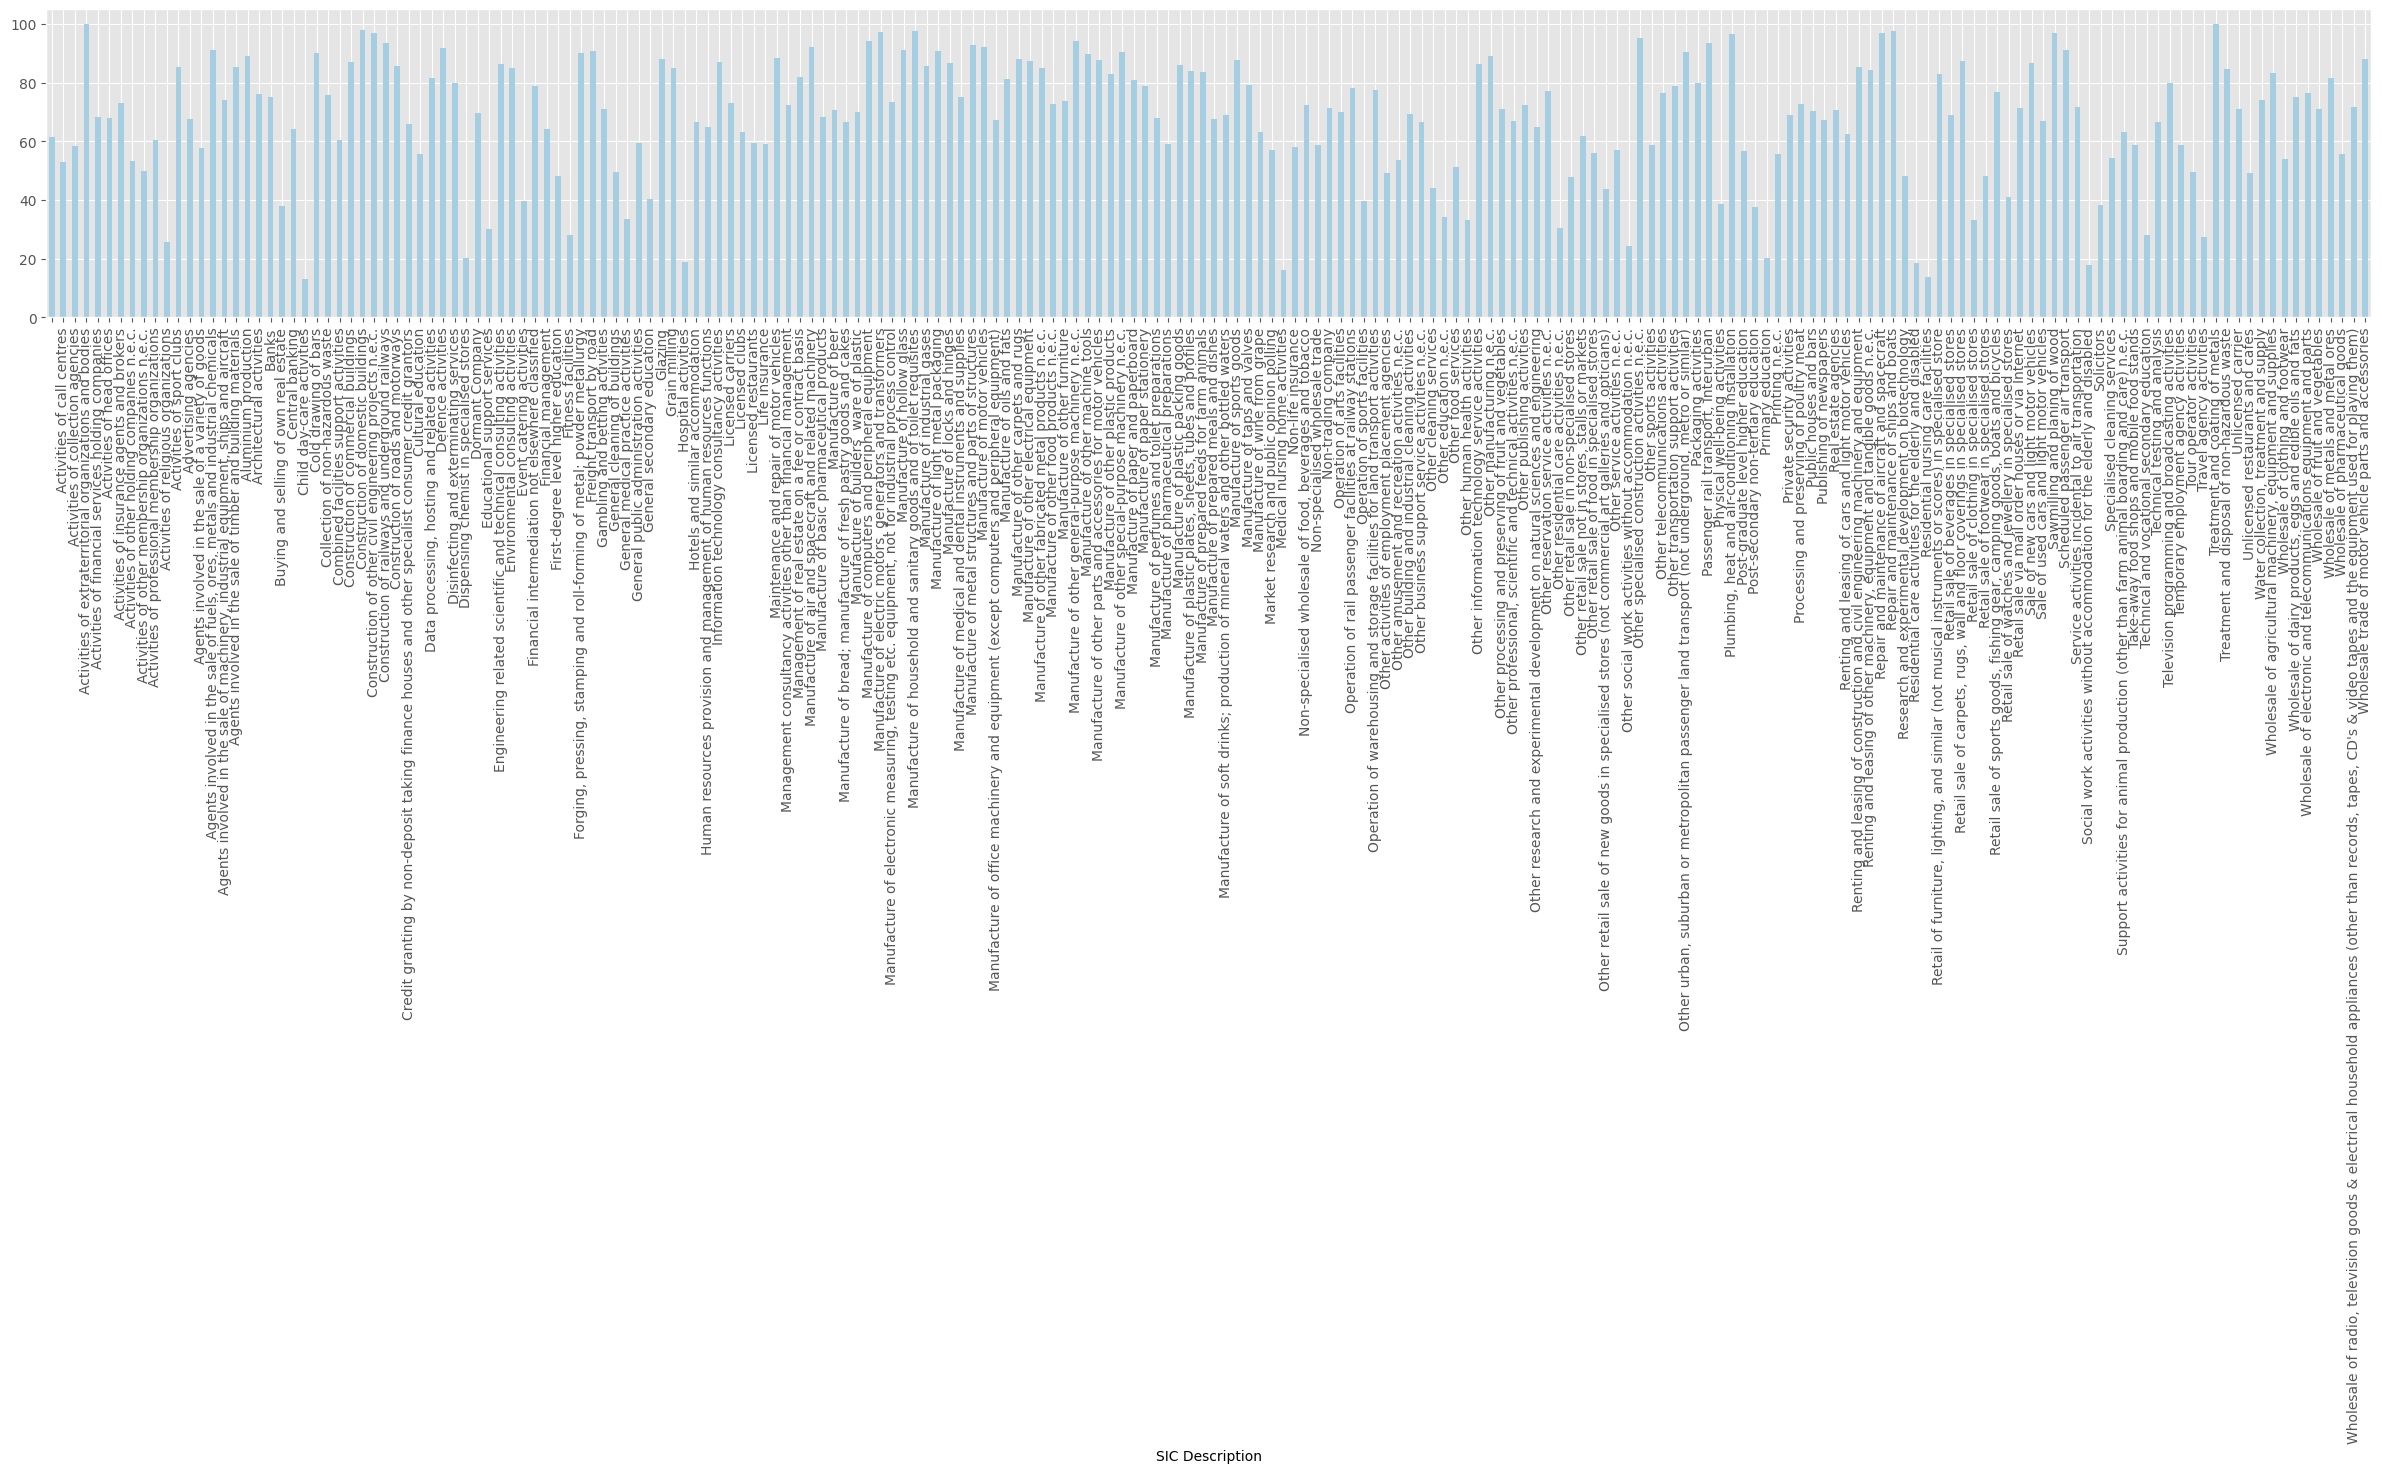

In [16]:
# MALE EMPLOYEES IN THE TOP QUARTILE 
sector_meanwage = data.groupby('SIC Description')['Male top quartile %'].mean()
sector_meanwage.plot(kind='bar', stacked = 'true', colormap = 'Paired', figsize=(30, 4))

top_sectors = sector_meanwage.nlargest(5)
print('The top 5 sectors with the most male employees in the top is:\n', top_sectors,'\n')

low_sectors = sector_meanwage.nsmallest(5)
print('The top 5 sectors with the least male employees in the top is:\n', low_sectors)

Not surprisingly, men are most represented in the top quartile in sectors like Activities of extraterritorial organizations and bodies and Treatment and coating of metals. In contrast, the sectors with the least representation of men in the top quartile include Child day-care activities and Medical nursing home activities. This aligns with our previous analysis of the distribution of women in the top quartile.

It’s noteworthy that even in the top five sectors with the fewest men in the top quartile, there remains around 10-15% male representation, with the lowest being 13.2%. In comparison, the top five sectors with the least female representation in the top quartile only reach 2.5%, with the top two sectors—Activities of extraterritorial organizations and bodies and Treatment and coating of metals—having no female employees at all. Both of these sectors rank among the top five in terms of paying men more.

This suggests that the wage gap may also be rooted in the fact that more men than women occupy top positions within these companies.

Now, let’s examine the distribution of men in the bottom quartile.

The top 5 sectors with the most male employees in the bottom is:
 SIC Description
Forging, pressing, stamping and roll-forming of metal; powder metallurgy        95.0
Retail sale of carpets, rugs, wall and floor coverings in specialised stores    94.3
Treatment and disposal of non-hazardous waste                                   92.3
Construction of domestic buildings                                              89.8
Manufacture of light metal packaging                                            89.5
Name: Male bottom quartile %, dtype: float64 

The top 5 sectors with the least male employees in the bottom is:
 SIC Description
Treatment and coating of metals                                0.000
Retail sale of watches and jewellery in specialised stores     6.000
Child day-care activities                                      6.175
Event catering activities                                      9.900
Residential nursing care facilities                           13.740
Name: Male bottom 

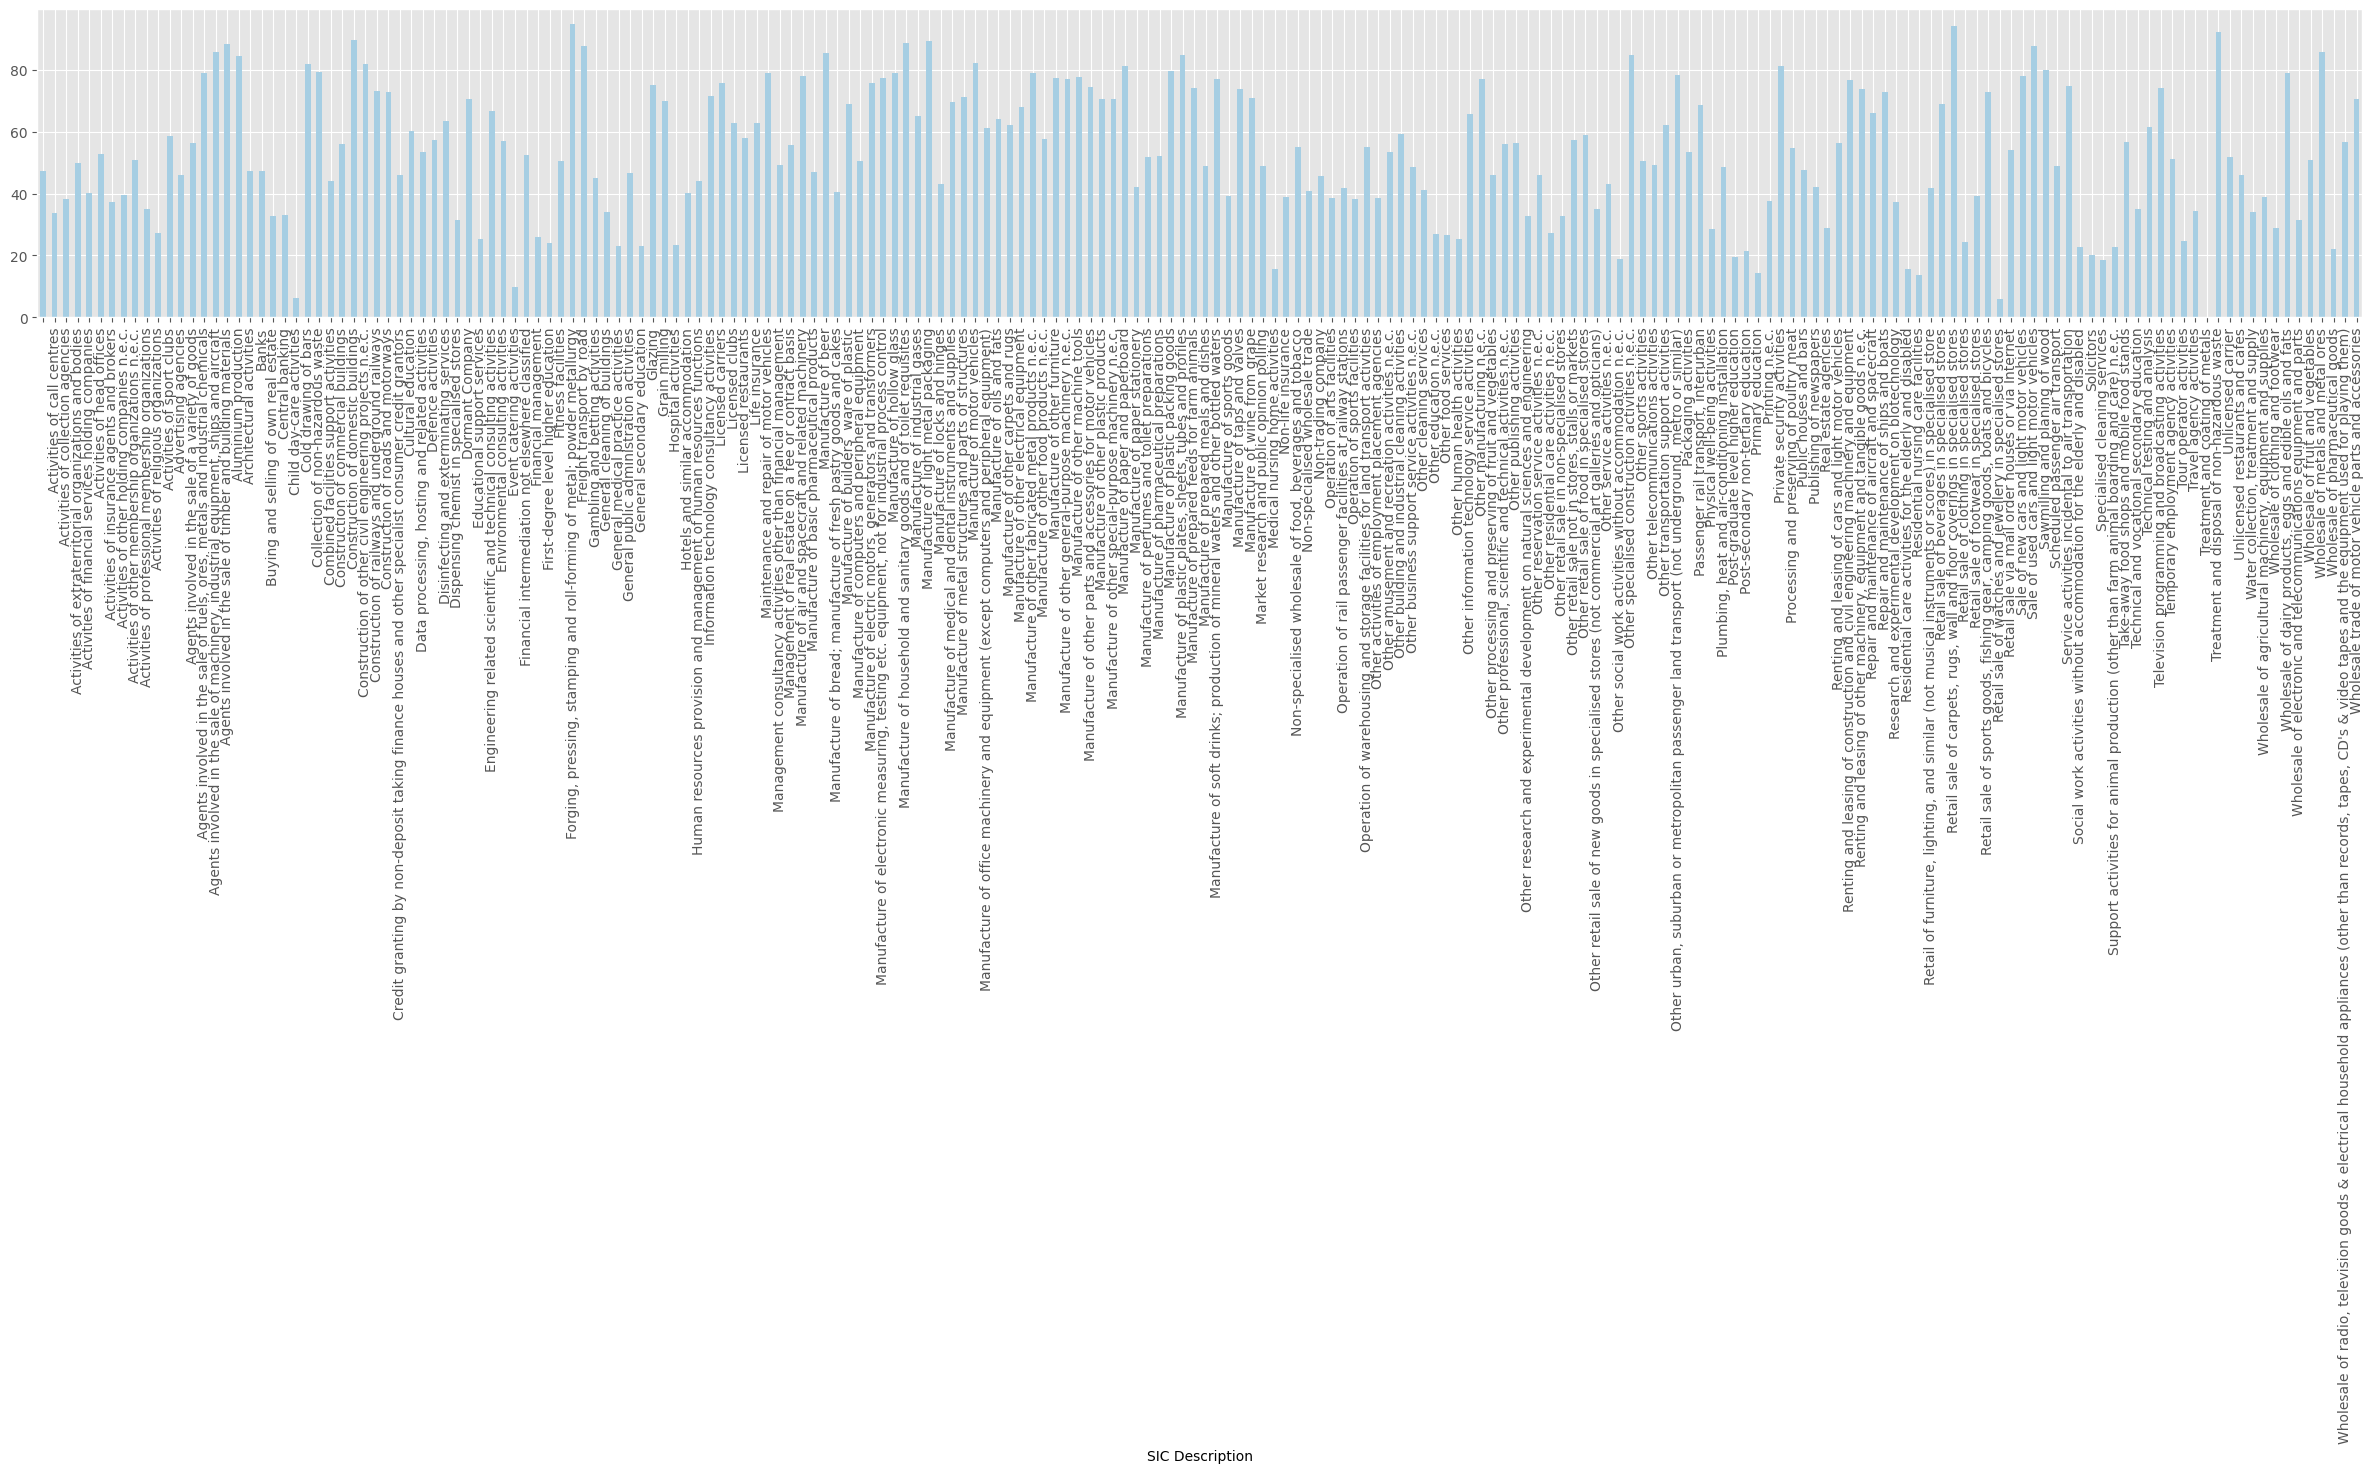

In [17]:
# MALE EMPLOYEES IN THE BOTTOM QUARTILE 
sector_meanwage = data.groupby('SIC Description')['Male bottom quartile %'].mean()
sector_meanwage.plot(kind='bar', stacked = 'true', colormap = 'Paired', figsize=(30, 4))

top_sectors = sector_meanwage.nlargest(5)
print('The top 5 sectors with the most male employees in the bottom is:\n', top_sectors,'\n')

low_sectors = sector_meanwage.nsmallest(5)
print('The top 5 sectors with the least male employees in the bottom is:\n', low_sectors)

The same gendered pattern emerges here as well. Men are almost absent from caring and hospitality sectors like Child day-care activities, where only 6.2% of employees in the bottom quartile are men, despite men holding 13.2% of the top positions in the same sector. This discrepancy indicates a misalignment in the promotion distribution within these companies.

In contrast, men are more prominently represented in sectors such as Forging, pressing, stamping, and roll-forming of metals; powder metallurgy, Treatment and disposal of non-hazardous waste, and Construction of domestic buildings. This observation ties back to the negative values we noted earlier, which indicated that in these sectors, a small number of women in top positions are earning significantly more than the average worker. Interestingly, these sectors did not appear when analyzing the proportion of female employees in the top quartile.

This aligns with our earlier finding that the mean wage difference was much greater when men earned more on average compared to when women were the higher earners.

# MEDIAN WAGE DIFFERENCE 
The data  dataframe offers both the mean and median values of the wage gap. The mean represents the average wage gap across all values, while the median indicates the middle value of the wage gaps.

When there is a significant difference between the median and mean wage gaps, it can suggest the presence of extreme values at either end of the scale that differ substantially from the other values.

To explore this further, I will examine the median wage gap grouped by sectors.

The top 5 sectors with the biggest median wage difference is:
 SIC Description
Activities of extraterritorial organizations and bodies               64.8
Treatment and coating of metals                                       61.3
Plumbing, heat and air-conditioning installation                      48.9
Wholesale of electronic and telecommunications equipment and parts    37.8
Repair and maintenance of ships and boats                             37.0
Name: Median wage difference %, dtype: float64 

The top 5 sectors with the smallest median wage difference is:
 SIC Description
Forging, pressing, stamping and roll-forming of metal; powder metallurgy   -48.1
Manufacture of beer                                                        -23.0
Fitness facilities                                                         -20.1
Manufacture of household and sanitary goods and of toilet requisites       -17.7
Licensed carriers                                                          -17.0
Name: Median

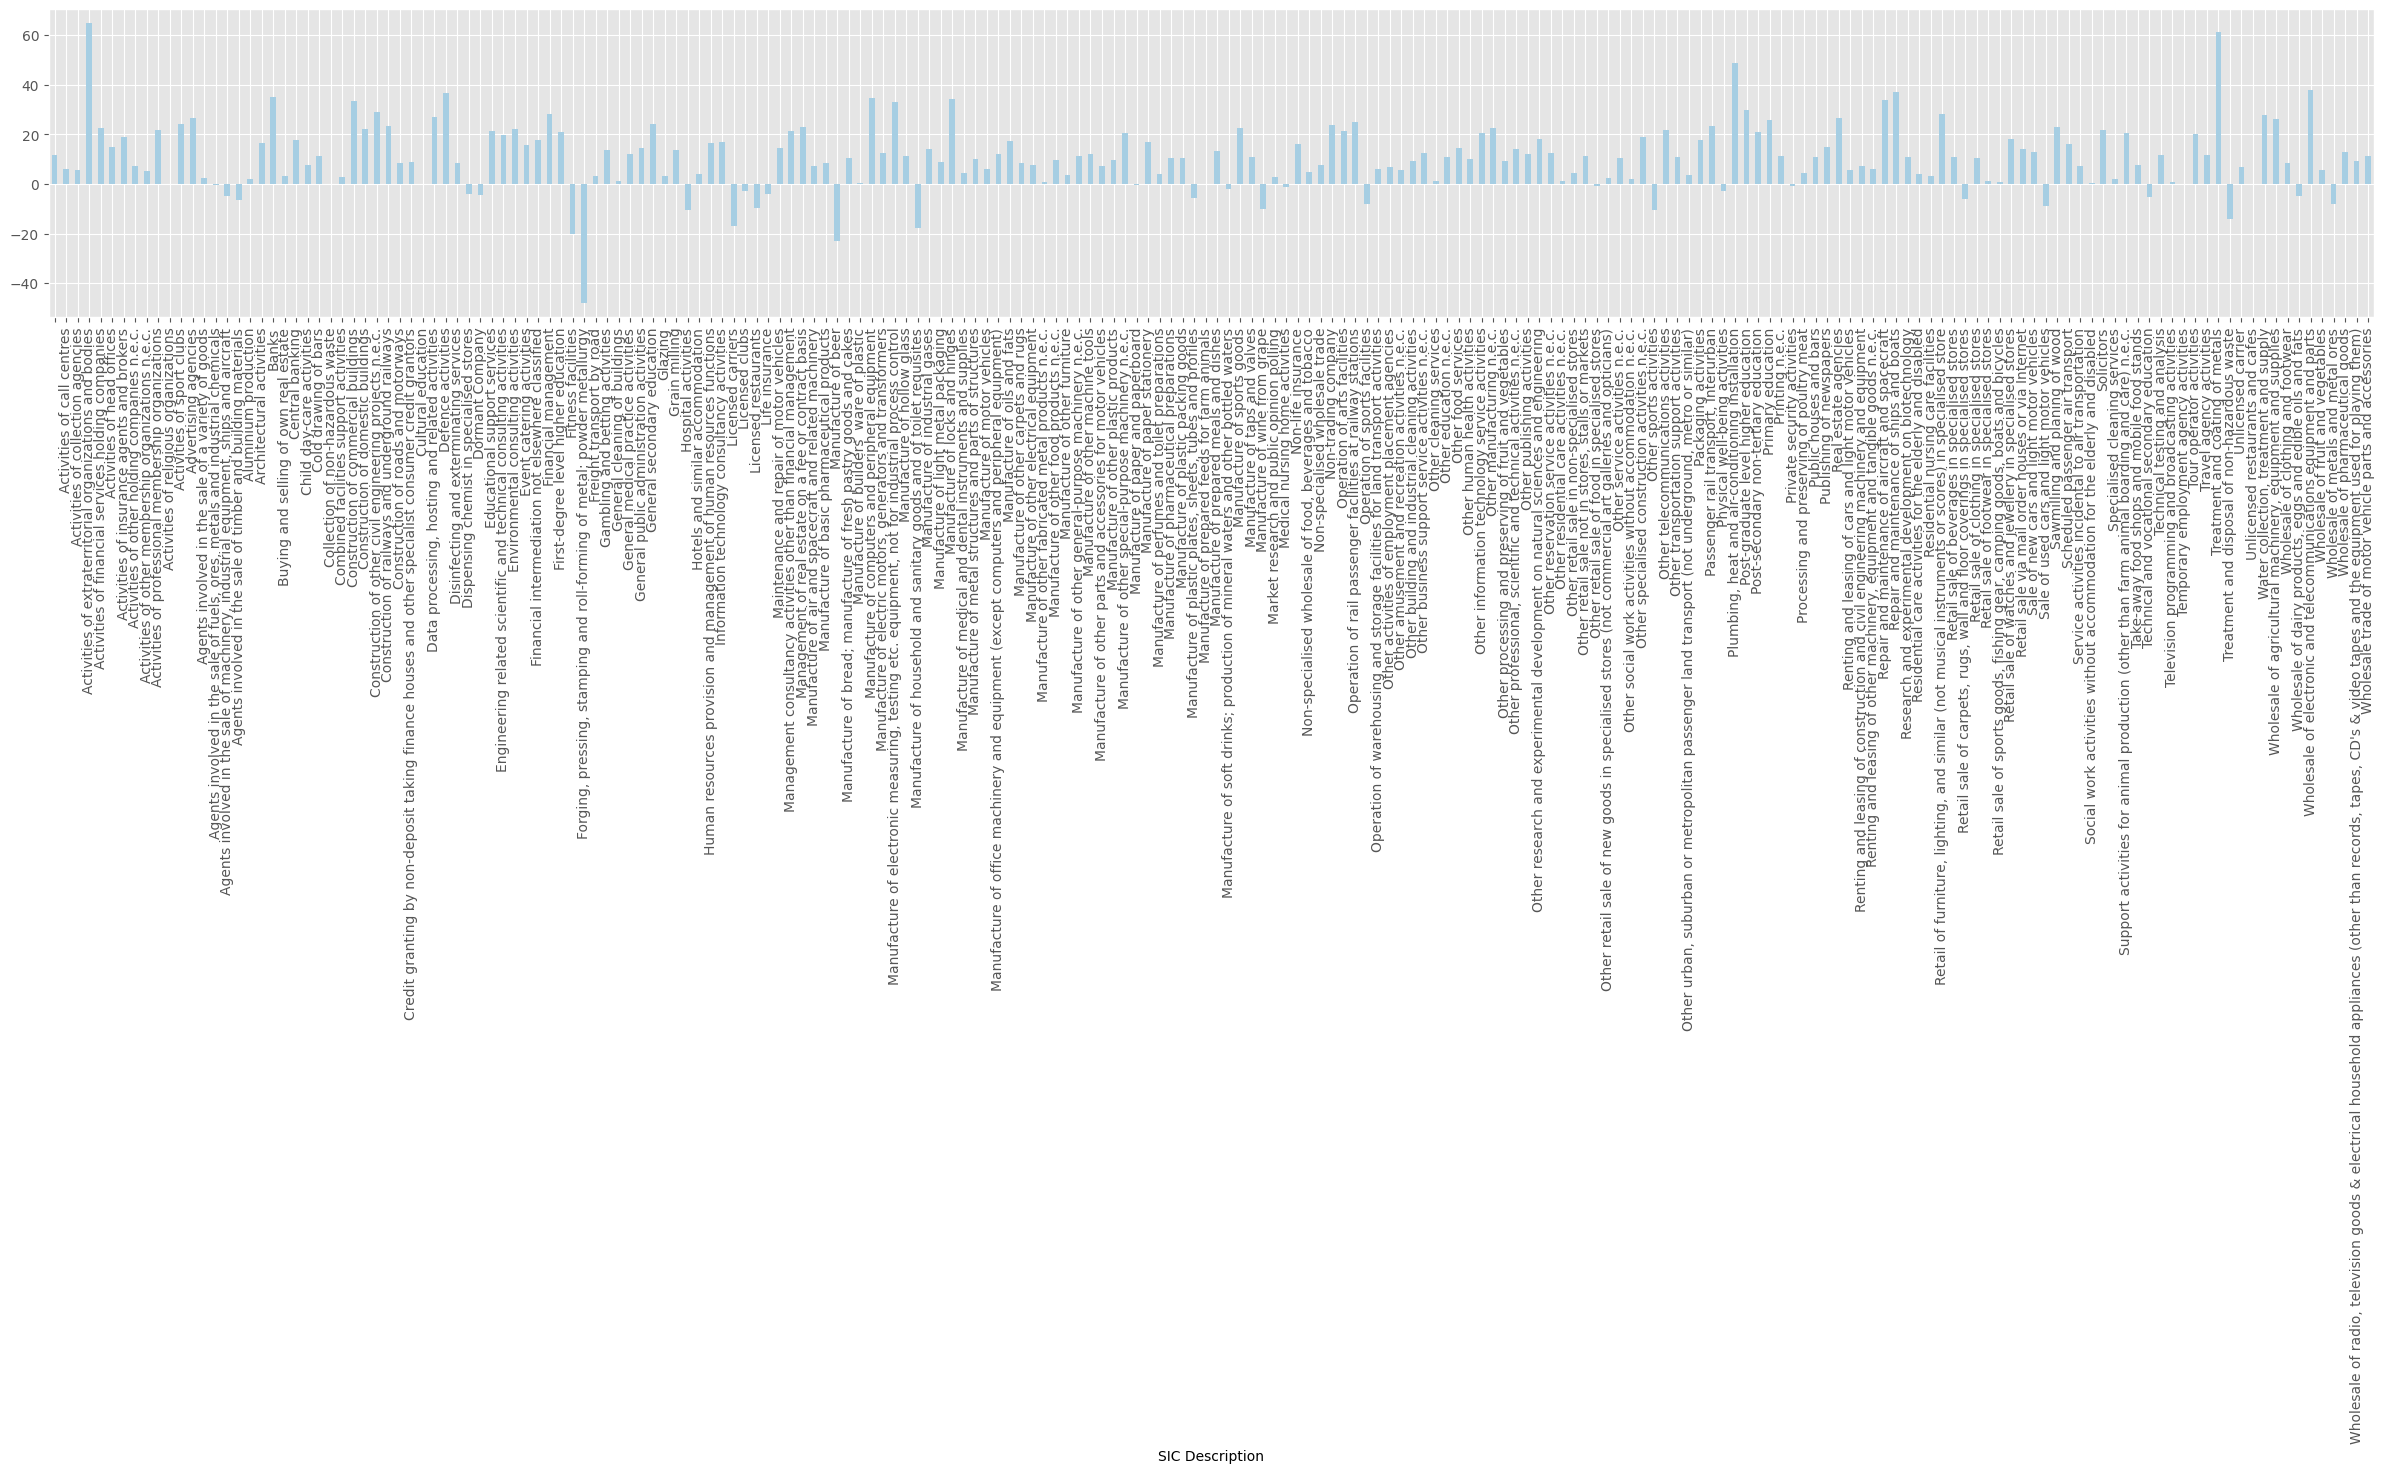

In [18]:
# MEDIAN WAGE DIFFERENCE 
sector_meanwage = data.groupby('SIC Description')['Median wage difference %'].mean()
sector_meanwage.plot(kind='bar', stacked = 'true', colormap = 'Paired', figsize=(30, 4))

top_sectors = sector_meanwage.nlargest(5)
print('The top 5 sectors with the biggest median wage difference is:\n', top_sectors,'\n')

low_sectors = sector_meanwage.nsmallest(5)
print('The top 5 sectors with the smallest median wage difference is:\n', low_sectors)


The results for the sectors with the largest average wage gaps are generally consistent. However, it’s notable that the sector Activities of sport clubs, which had the highest mean wage difference, does not appear in the top five for the largest median wage difference. This suggests that wages in this sector are highly concentrated at the top, with a few men earning significantly more than the rest, leading to a more even distribution of lower wages among other employees.

We are also observing negative values in the sectors with the smallest median wage gaps, which aligns with our previous findings regarding mean wage distribution. However, the sector Forging, pressing, stamping, and roll-forming of metals; powder metallurgy is the only one that recurs in this analysis, indicating that the wage gap distribution is not symmetrical within the dataset.

This suggests that there are underlying complexities in the wage distribution across sectors, with certain industries exhibiting a skewed distribution that heavily favors a small number of higher earners, while others may show a more balanced wage distribution.

Another really interesting factor - maybe even more so than the wage gap - is the differences in bonus levels, as this is often distributed based on the way you perform within the organisation and often on the individual's interpersonal relations - it is often less restricted and can be given out more or less freely based on the boss's wishes and wants and thereby point to the structures and the inequality within an organisation. 

The top 5 sectors where the biggest amount of women were paid a bonus is:
 SIC Description
Cold drawing of bars                                           100.0
Manufacture of electric motors, generators and transformers    100.0
Scheduled passenger air transport                               99.0
Wholesale of agricultural machinery, equipment and supplies     96.5
Aluminium production                                            96.2
Name: Female bonus %, dtype: float64 

The top 5 sectors where the smallest amount of women were paid a bonus is:
 SIC Description
Activities of extraterritorial organizations and bodies                               0.0
Agents involved in the sale of machinery, industrial equipment, ships and aircraft    0.0
Central banking                                                                       0.0
Child day-care activities                                                             0.0
Disinfecting and exterminating services                                  

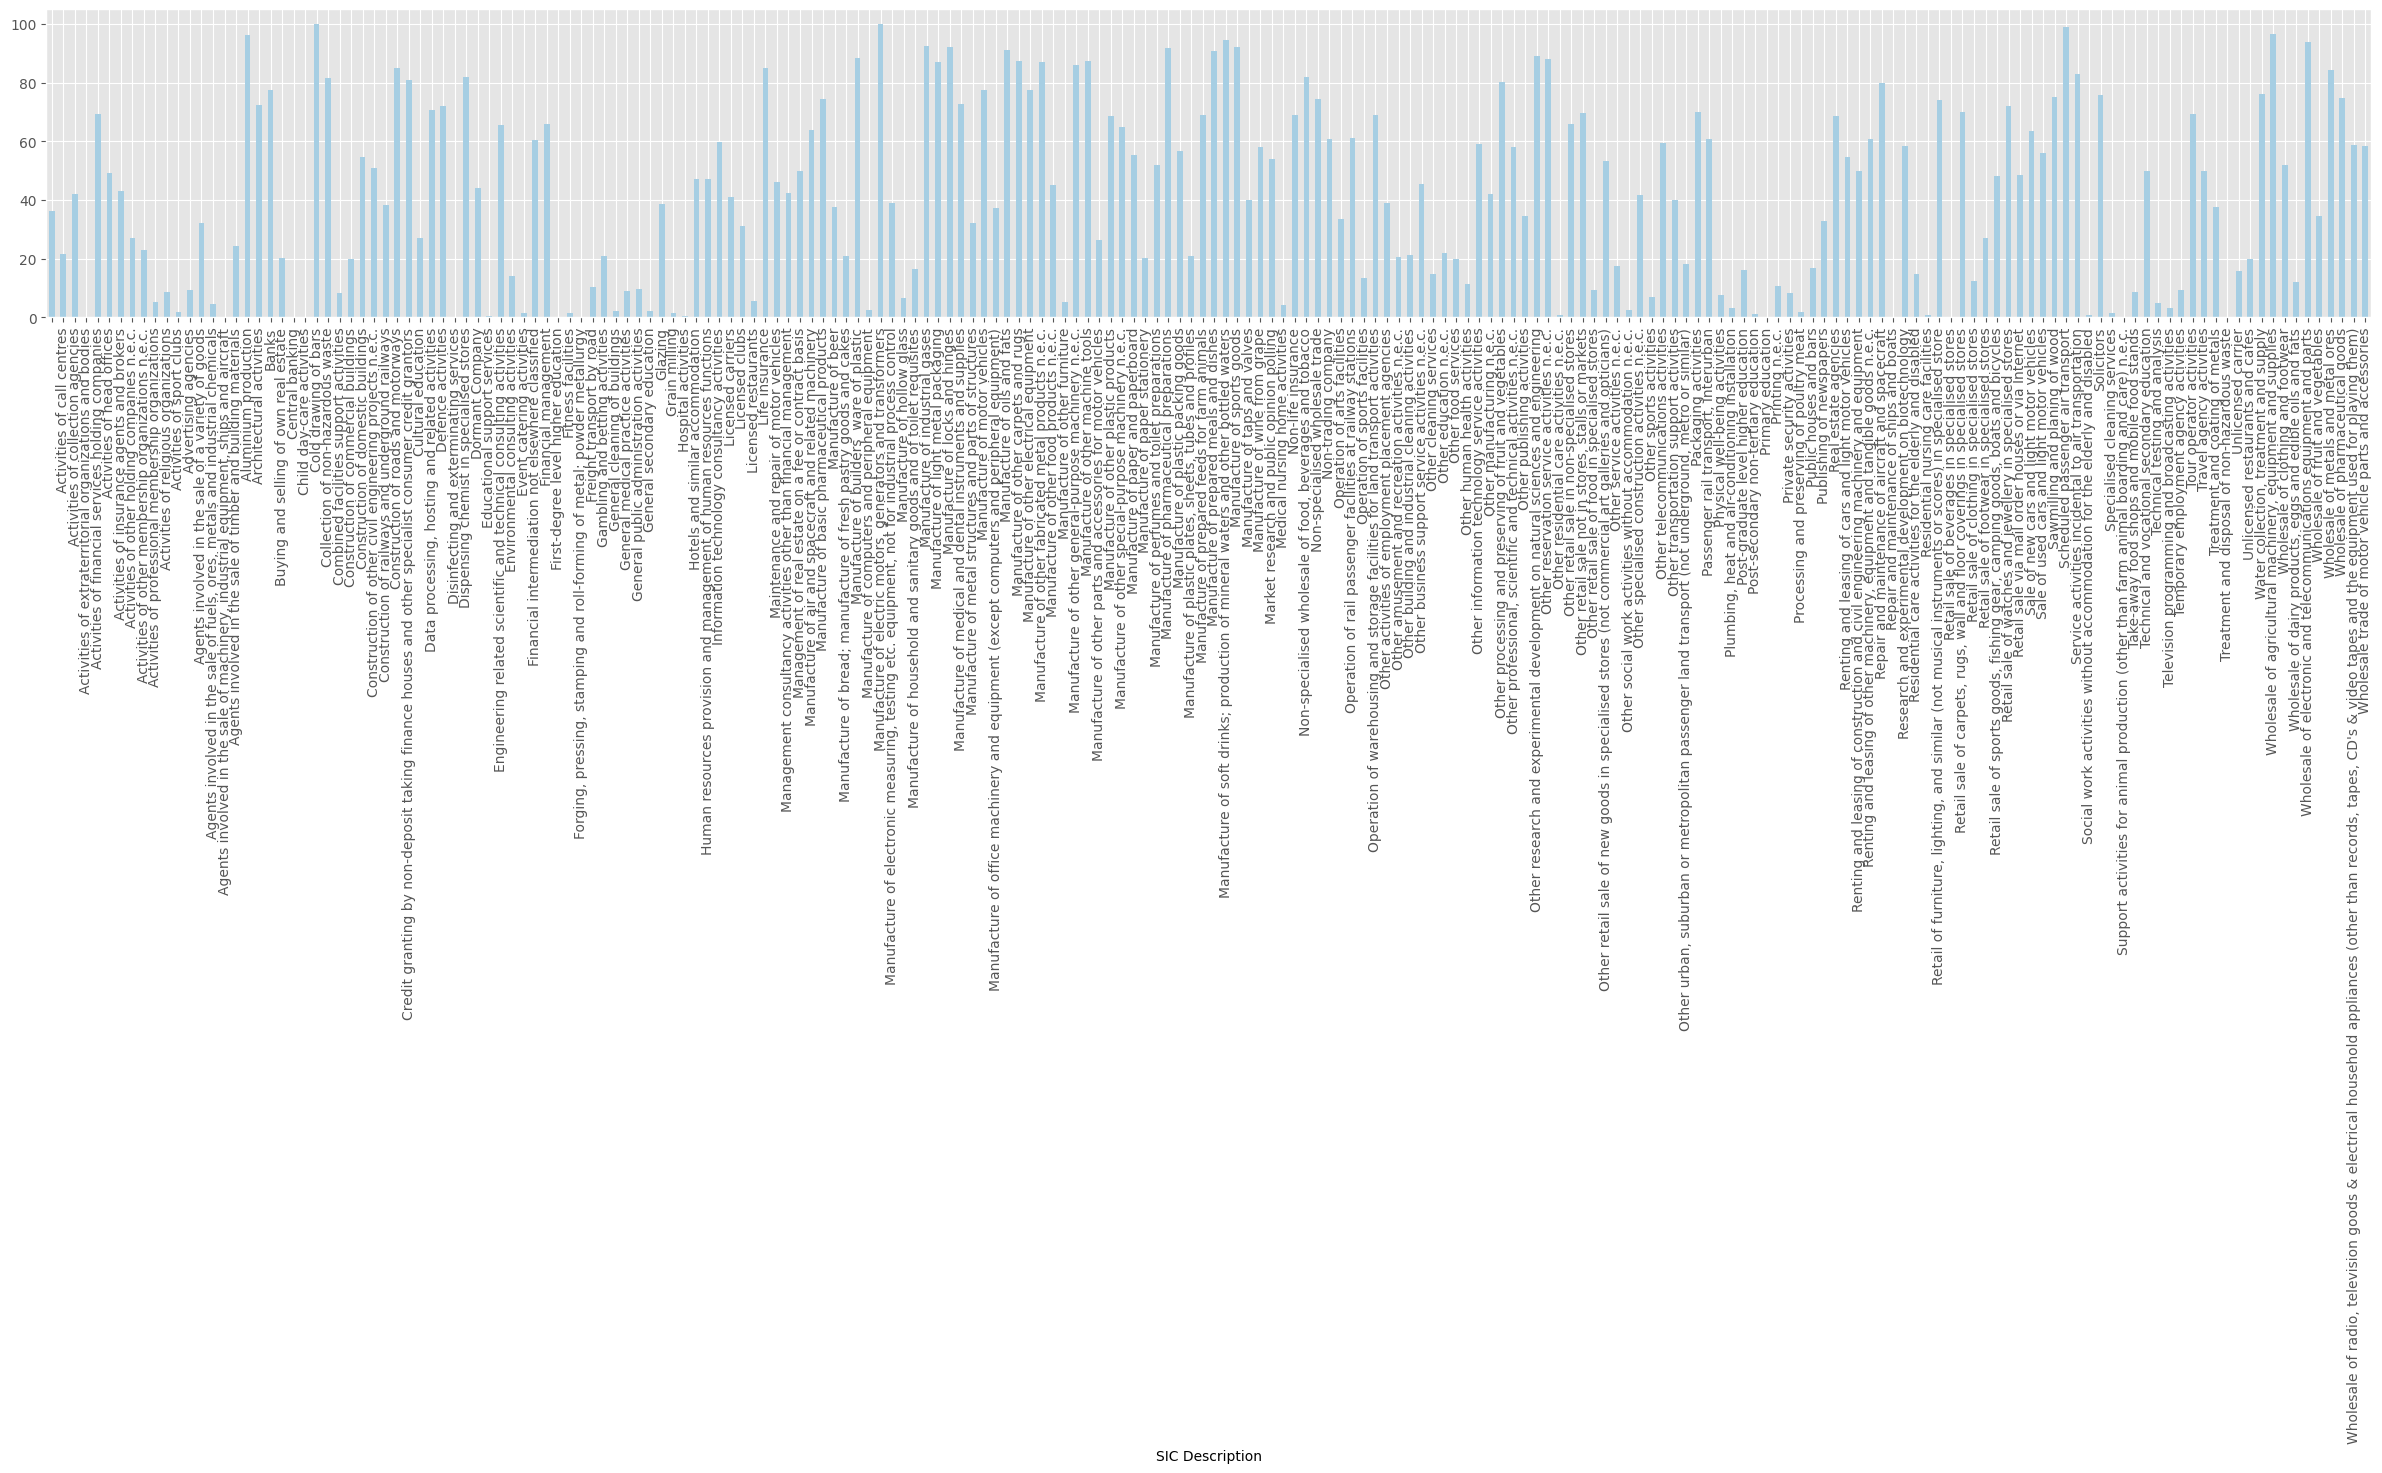

In [19]:
# FEMALE BONUS
sector_meanwage = data.groupby('SIC Description')['Female bonus %'].mean()
sector_meanwage.plot(kind='bar', stacked = 'true', colormap = 'Paired', figsize=(30, 4))

top_sectors = sector_meanwage.nlargest(5)
print('The top 5 sectors where the biggest amount of women were paid a bonus is:\n', top_sectors,'\n')

low_sectors = sector_meanwage.nsmallest(5)
print('The top 5 sectors where the smallest amount of women were paid a bonus is:\n', low_sectors)

The one sector were no women were paid a bonus is 'Activities of extraterritorial organizations and bodies' which was also in the top 5 of the sectors with the biggest wage gap. 

It is also interesting that no women were paid a bonus in the sector, 'Child day-care activities' despite their high presence.. This could be indicating internal discrimation in the company, which would align with how the men in the top and the bottom quartile are distributed as we discovered earlier. 

Lets look at the men. 

The top 5 sectors where the biggest amount of men were paid a bonus is:
 SIC Description
Manufacture of electric motors, generators and transformers    99.6
Cold drawing of bars                                           99.3
Scheduled passenger air transport                              98.0
Aluminium production                                           97.5
Wholesale of agricultural machinery, equipment and supplies    97.2
Name: Male bonus %, dtype: float64 

The top 5 sectors where the smallest amount of men were paid a bonus is:
 SIC Description
Central banking                                                             0.0
Child day-care activities                                                   0.0
First-degree level higher education                                         0.0
Forging, pressing, stamping and roll-forming of metal; powder metallurgy    0.0
Primary education                                                           0.0
Name: Male bonus %, dtype: float64


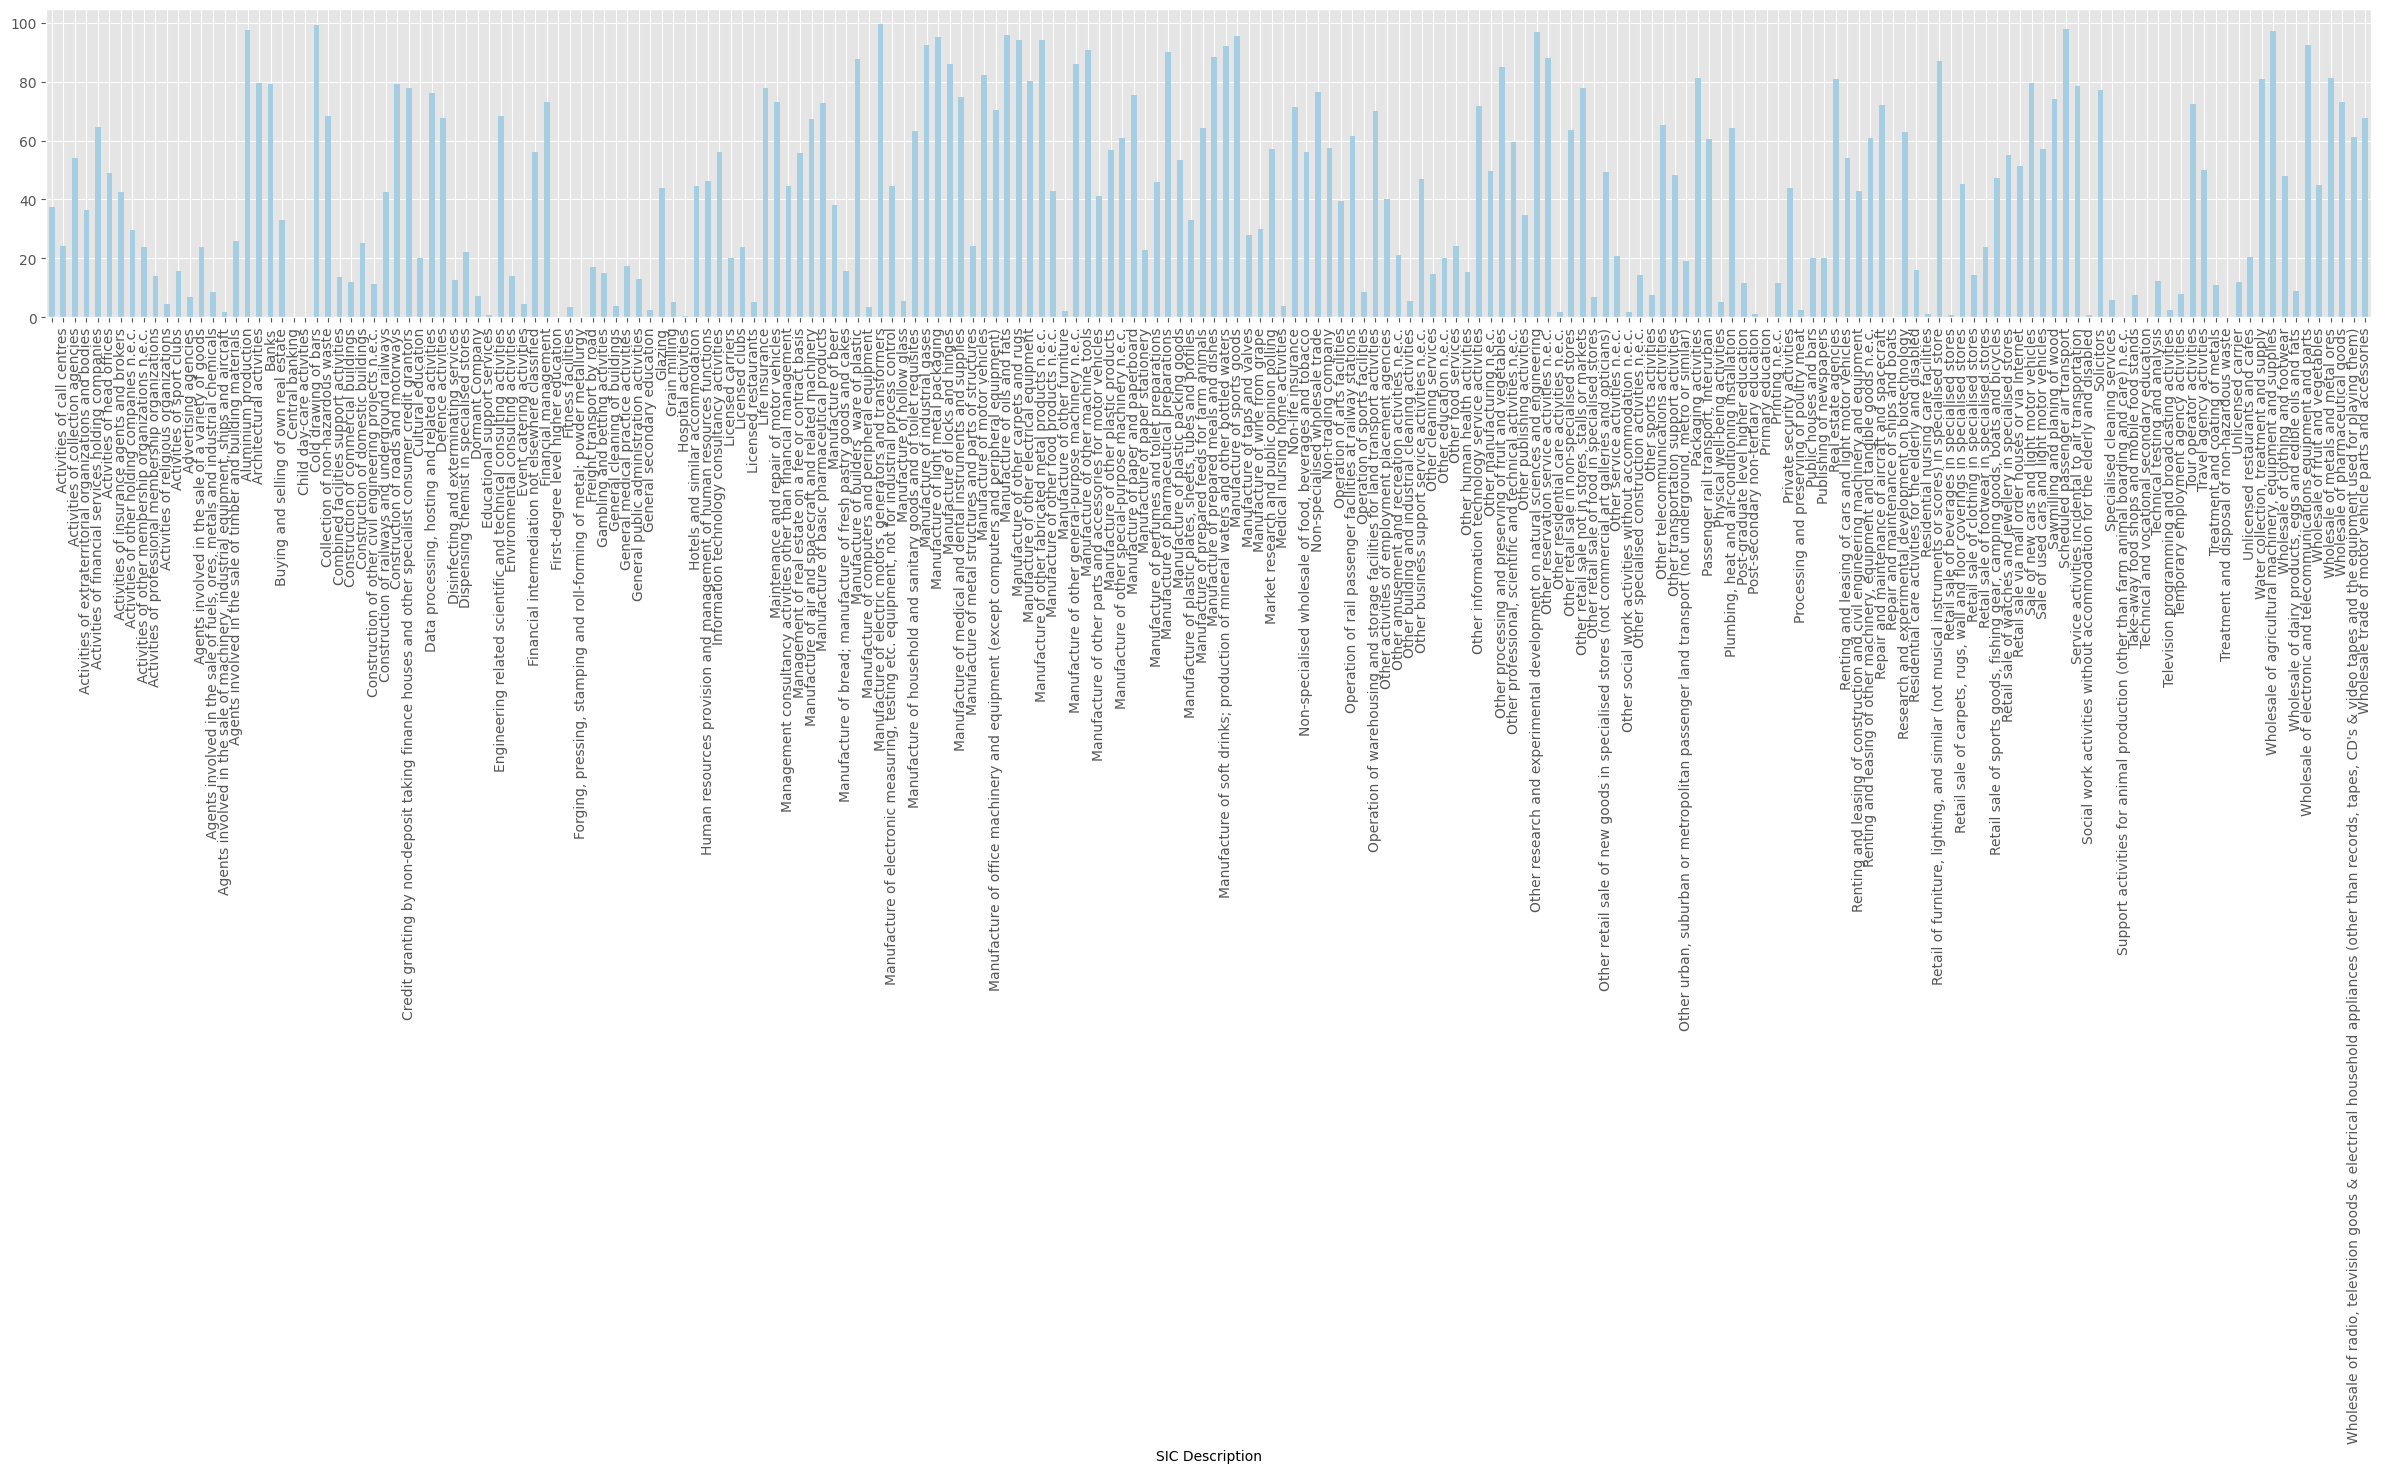

In [20]:
# MALE BONUS 
sector_meanwage = data.groupby('SIC Description')['Male bonus %'].mean()
sector_meanwage.plot(kind='bar', stacked = 'true', colormap = 'Paired', figsize=(30, 4))

top_sectors = sector_meanwage.nlargest(5)
print('The top 5 sectors where the biggest amount of men were paid a bonus is:\n', top_sectors,'\n')

low_sectors = sector_meanwage.nsmallest(5)
print('The top 5 sectors where the smallest amount of men were paid a bonus is:\n', low_sectors)


Interestingly, there is a complete overlap in the sectors where most men and women receive bonuses, with participation rates close to or at 100%. This suggests that different sectors may have varying systems for bonus distribution.

The same observation applies to the sectors where the fewest men and women receive bonuses, specifically Central banking and Child day-care activities, both reporting 0%. This rules out the theory of discrimination or favoritism regarding bonuses in the Child day-care activities sector mentioned earlier.

These patterns suggest that certain sectors consistently appear at the top of the wage gap rankings and are also among those hiring the fewest women for top positions or the most women in bottom positions.

To explore this further, I will predict the correlation between some of these variables.

# CORRELATIONS 





In [21]:
# only look at part of the data
relevant_cols = ['Mean wage difference %', 'Median wage difference %', 'Male bonus %', 'Female bonus %','Female top quartile %','Male top quartile %','Female bottom quartile %','Male bottom quartile %']
relevant_cols = data[relevant_cols]
relevant_cols_corr = relevant_cols.corr()
relevant_cols_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


C:\Users\Bruger\AppData\Local\Temp\ipykernel_3264\1334814203.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  relevant_cols_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


The prediction map reveals some interesting insights:

Both female and male bonuses appear to be negatively correlated with the number of women in both the top and bottom quartiles. In contrast, female and male bonuses show a positive correlation with the number of men in the bottom and top quartiles. This suggests that as the number of female employees in top positions increases, the bonuses for both men and women decrease, while the opposite holds true for men.

This pattern may reflect what we observed earlier with Child day-care activities, where men are more likely to occupy top positions in sectors that offer higher bonuses.

There also appears to be a positive correlation between the percentage of female employees in the bottom and top quartiles. Conversely, the percentage of female employees in both the top and bottom quartiles shows a negative correlation with the percentage of male employees in the top and bottom quartiles.

This clearly points to our earlier findings: many sectors are highly gendered. If there are a significant number of female employees in top positions, there is likely also a substantial number in the bottom quartile, indicating a tendency for these sectors to be in caregiving or hospitality.

Similarly, the variable for the percentage of men in the top quartile is negatively correlated with the percentage of women in the top quartile. This suggests that as the number of men in top positions increases, the likelihood of having female employees in those positions decreases, and vice versa.

This could indicate that men tend to hire other men, while women may be more effective at promoting gender distribution.

I plan to plot some of these variables to test these predictions. 

-0.7610539 99.272303260591 -0.7661181934322971


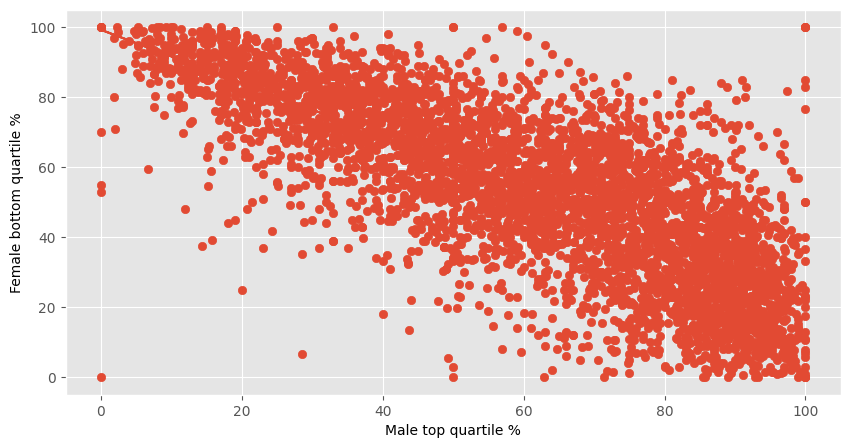

In [22]:
# PLOTTING THE VARIABLES 
d = data[["Male top quartile %",'Female bottom quartile %']].values
x = d[:,0]    
y = d[:,1]   
pd.set_option('display.float_format','{:.2f}'.format)   
np.set_printoptions(suppress=True)

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (10,5))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax

# FITTING THE LINEAR MODEL 
slope, intercept, r, p, std_err = st.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]            # this is our function

ax = plot_scatter(x,y,"Male top quartile %",'Female bottom quartile %')
ax.plot(x, model_y)
print(slope,intercept,r)



This analysis presents a linear regression model: f(x) = -0.76x + 99.3 with the independent variable, x = "Male top quartile %" and the dependent variable being, f(x) = 'Female bottom quartile % and the r-value = -0.78 

This suggests that as the number of men in top positions increases, the percentage of women in the bottom quartile decreases.

From previous analysis, we observed an overlap between sectors with the fewest female employees in the top quartile and the largest wage gaps. This indicates a correlation between the number of male employees in top positions and the wage gap. Let's investigate this further.

0.10138116 7.63515618088721 0.17599111376970875


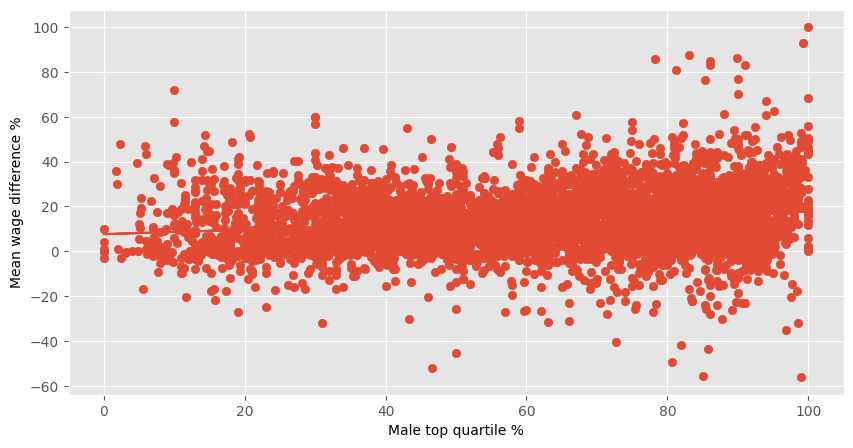

In [23]:
# PLOTTING THE VARIABLES 
d = data[['Male top quartile %','Mean wage difference %']].values
x = d[:,0]    
y = d[:,1]   
pd.set_option('display.float_format','{:.2f}'.format)   
np.set_printoptions(suppress=True)

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (10,5))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax

# FITTING THE LINEAR MODEL 
slope, intercept, r, p, std_err = st.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]            # this is our function

ax = plot_scatter(x,y,"Male top quartile %",'Mean wage difference %')
ax.plot(x, model_y)
print(slope,intercept,r)


The plot suggests that a linear model may not adequately capture the relationship between these variables.

To better understand the relationship, I will replot the data using NumPy's polyfit function to fit a polynomial model. This will help determine if a polynomial model provides a better fit and reveals any potential correlations.

In [24]:
# get the variables
x = (data["Male top quartile %"].values)
y = (data["Mean wage difference %"].values)

           10             9             8             7             6
3.114e-15 x  - 1.517e-12 x + 3.128e-10 x - 3.539e-08 x + 2.376e-06 x
              5            4           3             2
 - 9.534e-05 x + 0.002156 x - 0.02234 x + 0.0002087 x + 1.501 x + 5.132


r2 = 0.05151239172944466


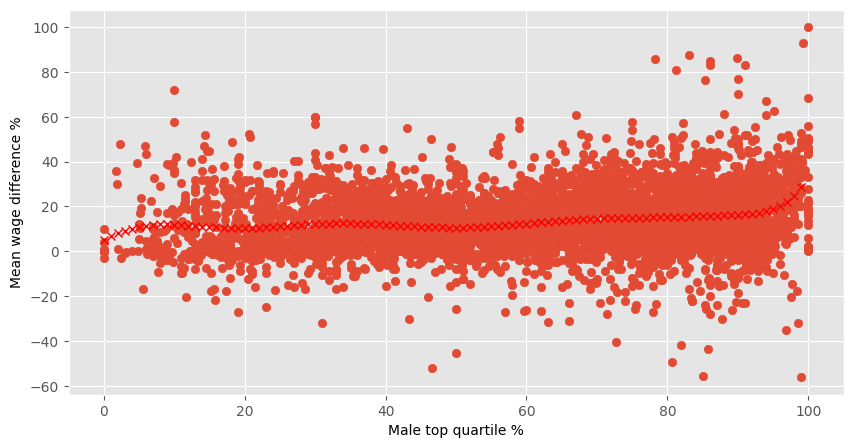

In [25]:
#CHANGE THIS!
num_degrees = 10
#Fit model
poly_model = np.polyfit(x, y, num_degrees)
poly_model = np.poly1d(poly_model)

#Get r2 score
r2 = r2_score(y, poly_model(x))

#Plot
ax = plot_scatter(x,y,"Male top quartile %","Mean wage difference %")
model_x = np.arange(np.max(x))
model_y = poly_model(model_x)
ax.plot(model_x,model_y,"rx")

print(poly_model)           # print the actual model 
print("\n")
print("r2 =",r2)

I experimented with various degrees of polynomial models, but none seemed to adequately describe the relationship between the variables. The prediction accuracy was only 0.18, indicating a weak fit.

Instead, I will visualize the data to identify any potential patterns or relationships. The code for this visualization will be adapted from the "Week 7 - Data Visualization" class notebook.

In [26]:
import pandas as pd
import plotly.graph_objs as go

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=data['Female top quartile %'],
                                   y=data['Mean wage difference %'],
                                   z=data['Male top quartile %'],
                                   mode='markers',
                                   marker=dict(
                                       size=3, 
                                       color=data['Mean wage difference %'],                                  
                                       colorscale='Rainbow', 
                                       opacity=0.8))])

# Set the title and axis labels
fig.update_layout(title='UK wage gap',
                  scene=dict(xaxis_title='Female top quartile %',
                             yaxis_title='Mean wage gaps %',
                             zaxis_title='Male top quartile %'),
                             margin=dict(l=0, r=0, t=40, b=0))

# Show the plot
fig.show()

We observe a strong negative correlation between the number of men in the top quartile and the number of women in the top quartile, resulting in a well-distributed set of data points in the 3D visualization.

These findings indicate that men dominate the top quartile across all sectors. There is an overlap between the sectors with the fewest female employees in the top quartile and those with the largest wage gaps, suggesting that men are more frequently promoted than women.

However, the sectors with the fewest men in the top quartile, along with the bonus distributions for both genders, highlight the overall gendered nature of these sectors. This pattern reflects the traditional associations between certain occupations and industries as typically male or female.

## ETHICS 


Another notable pattern in the data is its lack of diversity—specifically, the absence of information on race, queerness, and neurodivergence.

It would be insightful to examine the demographics of employees in the bottom quartile, particularly the percentage of people of color (POC), and compare it with the number of white individuals in the top quartile. We should also analyze how many white employees receive bonuses compared to their Black and Brown counterparts. Historically, white men and women have earned more than POC men and women, but this data does not allow us to explore those disparities.

This omission erases the gaps and discrimination that would become apparent if we could analyze pay disparities among white individuals, POC, and nonbinary or gender-nonconforming people. Therefore, interpreting this data as a complete picture is misleading, as it overlooks inequalities related to race, gender identity, and neurodivergence.

This also raises critical questions about the relevance of focusing on the wage gap between men and women in UK-based companies that operate within structures of white supremacy and colonialism. Many of our products—hardware, clothing, lentils, and vegetables—are produced in the Global South, often exploiting workers, especially women.

Thinking that the fight for gender equality is solely rooted in the wage gap in the UK, particularly among those in the top quartile, is both limiting and problematic.

Viewing this data as indicative of broader issues among working people fails to address how increased representation of white women in top positions benefits those in the Global South or working-class women struggling to make ends meet. Moreover, it ignores the experiences of nonbinary, transgender, and gender-nonconforming individuals, who are often not even included in these discussions.